In [1]:
# regrsion lineal 
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['Student_Performance.csv']))

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [5]:
arreglo=list(data.columns)

In [6]:
print(arreglo)
print(len(arreglo))


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
33


In [7]:
prominent_features =arreglo
data_prominent = data[prominent_features].copy()

In [8]:
mapping_school = {'GP' : 0, 'MS' : 1}
mapping_sex = {'F' : 0, 'M' : 1}
mapping_address = {'U' : 0, 'R' : 1}
mapping_famsize = {'GT3' : 0, 'LE3' : 1}
mapping_pstatus = {'A' : 0, 'T' : 1}
mapping_mjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_fjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_reason = {'course' : 0, 'other' : 1, 'home' : 2, 'reputation' : 3}
mapping_schoolsup = {'no' : 0, 'yes' : 1}
mapping_paid = {'no' : 0, 'yes' : 1}
mapping_higher = {'no' : 0, 'yes' : 1}
mapping_internet = {'no' : 0, 'yes' : 1}
mapping_guardian = {'mother' : int(0), 'father' : int(1)}
mapping_famsup = {'no' : 0, 'yes' : 1}
mapping_activities = {'no' : 0, 'yes' : 1}
mapping_nursery = {'no' : 0, 'yes' : 1}
mapping_romantic = {'no' : 0, 'yes' : 1}


In [9]:
data_prominent['school'] = data['school'].map(mapping_school)
data_prominent['sex'] = data['sex'].map(mapping_sex)
data_prominent['address'] = data['address'].map(mapping_address)
data_prominent['famsize'] = data['famsize'].map(mapping_famsize)
data_prominent['Pstatus'] = data['Pstatus'].map(mapping_pstatus)
data_prominent['Mjob'] = data['Mjob'].map(mapping_mjob)
data_prominent['Fjob'] = data['Fjob'].map(mapping_fjob)
data_prominent['reason'] = data['reason'].map(mapping_reason)
data_prominent['schoolsup'] = data['schoolsup'].map(mapping_schoolsup)
data_prominent['paid'] = data['paid'].map(mapping_paid)
data_prominent['higher'] = data['higher'].map(mapping_higher)
data_prominent['internet'] = data['internet'].map(mapping_internet)
data_prominent['health'] = data['health']
data_prominent['guardian'] = data['guardian'].map(mapping_guardian)
data_prominent['famsup'] = data['famsup'].map(mapping_famsup)
data_prominent['activities'] = data['famsup'].map(mapping_activities)
data_prominent['nursery'] = data['nursery'].map(mapping_nursery)
data_prominent['romantic'] = data['romantic'].map(mapping_romantic)

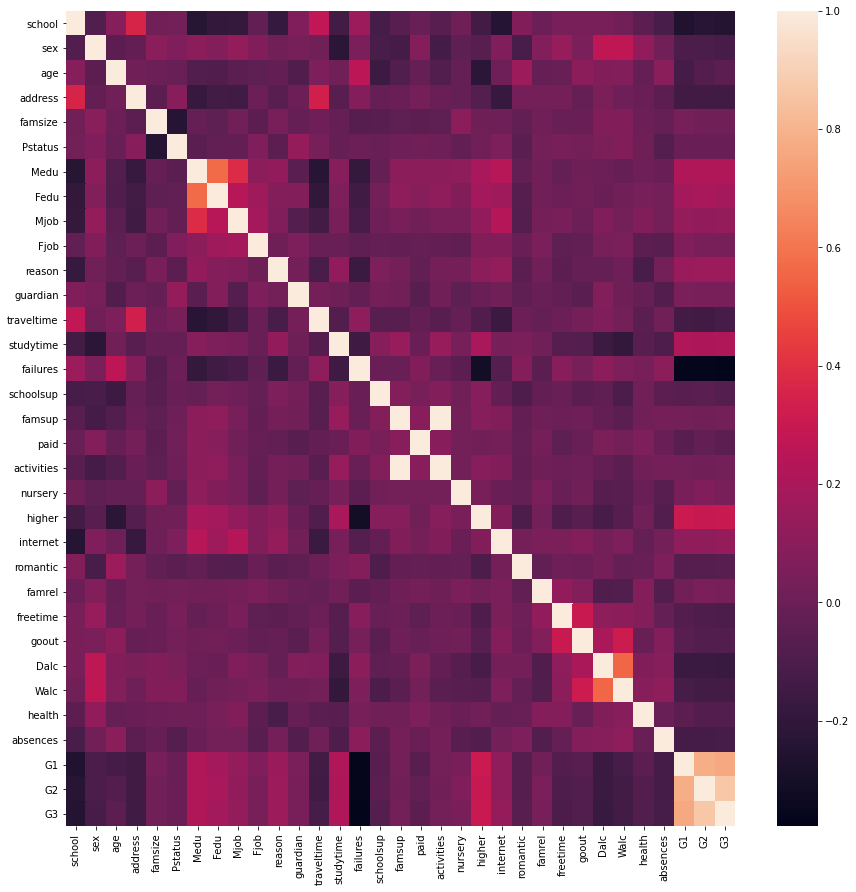

In [ ]:
corr = data_prominent.corr("kendall")
plt.figure(figsize=(15,15))
sns.heatmap(corr)

In [10]:
#matriz de correlacion
data['G3']
for i in range (0,len(list(data.columns))):
  print(i)
  col= data_prominent[list(data.columns)[i]]
  print(f"coeficiente de correlacion entre G3 y {list(data.columns)[i]}" )
  print(np.corrcoef(data['G3'],col))



0
coeficiente de correlacion entre G3 y school
[[ 1.         -0.28429416]
 [-0.28429416  1.        ]]
1
coeficiente de correlacion entre G3 y sex
[[ 1.         -0.12907749]
 [-0.12907749  1.        ]]
2
coeficiente de correlacion entre G3 y age
[[ 1.         -0.10650539]
 [-0.10650539  1.        ]]
3
coeficiente de correlacion entre G3 y address
[[ 1.         -0.16763735]
 [-0.16763735  1.        ]]
4
coeficiente de correlacion entre G3 y famsize
[[1.         0.04501637]
 [0.04501637 1.        ]]
5
coeficiente de correlacion entre G3 y Pstatus
[[ 1.0000000e+00 -7.5392505e-04]
 [-7.5392505e-04  1.0000000e+00]]
6
coeficiente de correlacion entre G3 y Medu
[[1.         0.24015076]
 [0.24015076 1.        ]]
7
coeficiente de correlacion entre G3 y Fedu
[[1.         0.21179968]
 [0.21179968 1.        ]]
8
coeficiente de correlacion entre G3 y Mjob
[[1.         0.14825209]
 [0.14825209 1.        ]]
9
coeficiente de correlacion entre G3 y Fjob
[[1.         0.05295329]
 [0.05295329 1.        ]]

In [ ]:
data_prominent.corr('pearson')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,-0.206829,0.066731,0.252936,-0.137857,0.113788,-0.123340,-0.063720,-0.007905,-0.063720,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,-0.083050,1.000000,-0.043662,-0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,0.021821,0.039197,0.040880,-0.206214,0.073888,-0.111202,-0.129467,0.079300,-0.129467,-0.043603,-0.058134,0.065911,-0.110144,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,0.087170,-0.043662,1.000000,0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,-0.028593,-0.100788,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.005458,-0.101894,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,0.354520,-0.025503,0.025848,1.000000,-0.046113,0.094635,-0.190320,-0.141493,-0.159761,0.006535,-0.075417,0.001661,0.344902,-0.062023,0.063824,-0.017956,-0.005577,0.030483,-0.005577,-0.018077,-0.076706,-0.175794,0.030939,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.157127,-0.154600,-0.167637
famsize,0.022252,0.098205,-0.002470,-0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,0.051393,-0.012829,0.012794,-0.010945,-0.066068,-0.056405,-0.039819,-0.050253,-0.039819,0.100686,0.004523,0.013357,-0.032936,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,-0.005631,0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,-0.055591,0.135783,0.040633,-0.008748,-0.009881,-0.009456,0.010203,0.015923,0.010203,-0.032724,0.022726,0.059754,-0.053828,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.015251,0.018689,-0.000754
Medu,-0.254787,0.119127,-0.107832,-0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,0.150875,-0.058065,-0.265079,0.097006,-0.172210,-0.022168,0.120491,0.113973,0.120491,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,-0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,0.091683,0.080294,-0.208288,0.050400,-0.165915,0.023572,0.135191,0.094628,0.135191,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,-0.206829,0.149635,-0.071770,-0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,0.092676,-0.069589,-0.164126,0.057176,-0.117882,0.007992,0.038817,0.011869,0.038817,0.041927,0.148116,0.260658,-0.074286,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,-0.081872,0.080466,-0.050846,0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,0.028108,0.039361,0.004749,-0.019125,-0.055415,-0.013396,-0.038630,-0.020841,-0.038630,-0.045800,0.089929,0.088625,-0.002835,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.109847,0.086343,0.052953


In [ ]:
data_prominent.corr('kendall')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.086581,0.354520,0.022252,0.028120,-0.234068,-0.193054,-0.185417,-0.033205,-0.180393,0.066731,0.277129,-0.133834,0.154388,-0.123340,-0.063720,-0.007905,-0.063720,0.004659,-0.136112,-0.240486,0.072241,0.003538,0.043470,0.043514,0.046165,0.020923,-0.049317,-0.114713,-0.259013,-0.230340,-0.244483
sex,-0.083050,1.000000,-0.046636,-0.025503,0.098205,0.064700,0.107417,0.078259,0.132263,0.073535,0.022043,0.039197,0.024957,-0.220565,0.048354,-0.111202,-0.129467,0.079300,-0.129467,-0.043603,-0.058134,0.065911,-0.110144,0.074490,0.140201,0.048380,0.270275,0.269314,0.126229,0.019864,-0.100220,-0.104905,-0.115050
age,0.086581,-0.046636,1.000000,0.022126,0.002212,-0.007422,-0.084546,-0.091611,-0.051555,-0.040566,-0.026861,-0.088702,0.058240,0.014643,0.258367,-0.159244,-0.084933,-0.013132,-0.084933,-0.022578,-0.218870,0.010319,0.156009,-0.016253,-0.007958,0.106809,0.070584,0.077979,-0.015027,0.098890,-0.127850,-0.078905,-0.048451
address,0.354520,-0.025503,0.022126,1.000000,-0.046113,0.094635,-0.175152,-0.134509,-0.142444,-0.001800,-0.064868,0.001661,0.335144,-0.066245,0.084250,-0.017956,-0.005577,0.030483,-0.005577,-0.018077,-0.076706,-0.175794,0.030939,0.028205,0.034442,-0.015198,0.057291,0.011897,-0.006640,-0.045113,-0.139887,-0.137568,-0.145392
famsize,0.022252,0.098205,0.002212,-0.046113,1.000000,-0.239608,-0.014867,-0.039794,0.021876,-0.050180,0.045110,-0.012829,0.013827,-0.014237,-0.068643,-0.056405,-0.039819,-0.050253,-0.039819,0.100686,0.004523,0.013357,-0.032936,0.015482,-0.010729,-0.003867,0.073250,0.072830,0.001897,-0.017868,0.036618,0.024760,0.016379
Pstatus,0.028120,0.064700,-0.007422,0.094635,-0.239608,1.000000,-0.051821,-0.029838,-0.026256,0.067734,-0.049152,0.135783,0.040009,-0.017926,0.000509,-0.009456,0.010203,0.015923,0.010203,-0.032724,0.022726,0.059754,-0.053828,0.027554,0.040784,0.026265,0.056516,0.069849,0.004961,-0.077170,-0.006234,-0.005634,-0.004391
Medu,-0.234068,0.107417,-0.084546,-0.175152,-0.014867,-0.051821,1.000000,0.569954,0.385218,0.105071,0.125395,-0.052155,-0.230626,0.084420,-0.186684,-0.021688,0.109717,0.103806,0.109717,0.112129,0.195725,0.242462,-0.031761,0.021445,-0.023236,0.008406,0.002088,-0.015108,0.013076,-0.005538,0.218143,0.223391,0.222761
Fedu,-0.193054,0.078259,-0.091611,-0.134509,-0.039794,-0.029838,0.569954,1.000000,0.245883,0.161099,0.079378,0.074199,-0.195875,0.059178,-0.144756,0.025269,0.120017,0.085919,0.120017,0.069652,0.178019,0.168562,-0.066963,0.018178,0.000058,0.023896,-0.004344,0.024809,0.037859,0.025516,0.185440,0.194609,0.185576
Mjob,-0.185417,0.132263,-0.051555,-0.142444,0.021876,-0.026256,0.385218,0.245883,1.000000,0.176366,0.066054,-0.072235,-0.136114,0.045906,-0.115795,0.010612,0.042394,0.015420,0.042394,0.041999,0.126779,0.234635,-0.072101,0.033740,0.044405,0.000448,0.067341,0.026335,0.073181,0.027917,0.138058,0.123216,0.136382
Fjob,-0.033205,0.073535,-0.040566,-0.001800,-0.050180,0.067734,0.105071,0.161099,0.176366,1.000000,0.004779,0.060991,-0.009420,-0.011121,-0.038592,-0.021822,-0.026086,-0.016315,-0.026086,-0.037556,0.069144,0.070001,-0.002222,0.048530,-0.041229,-0.031851,0.039386,0.047135,-0.048362,-0.065592,0.066213,0.045525,0.040238


In [11]:
# graico de ppuntos de correlacion
from scipy.stats import spearmanr

col_rel=[]
for i in range (0,len(list(data.columns))):
  col= data_prominent[list(data.columns)[i]]
  coef, p= spearmanr(data['G3'],col)
  print("Coeficiente de correlacion sperman: %.3f" % coef)
    
  alpha=0.05 ##95% de que las pruebas no esten relacionadas
  if p> alpha:
    print(f" NO estan relacionadas G3 y {list(data.columns)[i]}", "p=%.3f" % p )
  else:
    print(f" SI estan relacionadas G3 y {list(data.columns)[i]}", "p=%.3f" % p )
    col_rel.append(list(data.columns)[i])


  print(np.corrcoef(data['G3'],col))

print(col_rel)

Coeficiente de correlacion sperman: -0.285
 SI estan relacionadas G3 y school p=0.000
[[ 1.         -0.28429416]
 [-0.28429416  1.        ]]
Coeficiente de correlacion sperman: -0.134
 SI estan relacionadas G3 y sex p=0.001
[[ 1.         -0.12907749]
 [-0.12907749  1.        ]]
Coeficiente de correlacion sperman: -0.066
 NO estan relacionadas G3 y age p=0.092
[[ 1.         -0.10650539]
 [-0.10650539  1.        ]]
Coeficiente de correlacion sperman: -0.170
 SI estan relacionadas G3 y address p=0.000
[[ 1.         -0.16763735]
 [-0.16763735  1.        ]]
Coeficiente de correlacion sperman: 0.019
 NO estan relacionadas G3 y famsize p=0.627
[[1.         0.04501637]
 [0.04501637 1.        ]]
Coeficiente de correlacion sperman: -0.005
 NO estan relacionadas G3 y Pstatus p=0.896
[[ 1.0000000e+00 -7.5392505e-04]
 [-7.5392505e-04  1.0000000e+00]]
Coeficiente de correlacion sperman: 0.284
 SI estan relacionadas G3 y Medu p=0.000
[[1.         0.24015076]
 [0.24015076 1.        ]]
Coeficiente de c

In [12]:
# graico de ppuntos de correlacion
from scipy.stats import kendalltau
col_relK=[]
for i in range (0,len(list(data.columns))):
  col= data_prominent[list(data.columns)[i]]
  coef, p= kendalltau(data['G3'],col)
  print("Coeficiente de correlacion kendall: %.3f" % coef)
    
  alpha=0.05 ##95% de que las pruebas no esten relacionadas
  if p> alpha:
    print(f" NO estan relacionadas G3 y {list(data.columns)[i]}", "p=%.3f" % p )
  else:
    print(f" SI estan relacionadas G3 y {list(data.columns)[i]}", "p=%.3f" % p )
    col_relK.append(list(data.columns)[i])


  print(np.corrcoef(data['G3'],col))
print(col_relK)

Coeficiente de correlacion kendall: -0.244
 SI estan relacionadas G3 y school p=0.000
[[ 1.         -0.28429416]
 [-0.28429416  1.        ]]
Coeficiente de correlacion kendall: -0.115
 SI estan relacionadas G3 y sex p=0.001
[[ 1.         -0.12907749]
 [-0.12907749  1.        ]]
Coeficiente de correlacion kendall: -0.048
 NO estan relacionadas G3 y age p=0.111
[[ 1.         -0.10650539]
 [-0.10650539  1.        ]]
Coeficiente de correlacion kendall: -0.145
 SI estan relacionadas G3 y address p=0.000
[[ 1.         -0.16763735]
 [-0.16763735  1.        ]]
Coeficiente de correlacion kendall: 0.016
 NO estan relacionadas G3 y famsize p=0.627
[[1.         0.04501637]
 [0.04501637 1.        ]]
Coeficiente de correlacion kendall: -0.004
 NO estan relacionadas G3 y Pstatus p=0.896
[[ 1.0000000e+00 -7.5392505e-04]
 [-7.5392505e-04  1.0000000e+00]]
Coeficiente de correlacion kendall: 0.223
 SI estan relacionadas G3 y Medu p=0.000
[[1.         0.24015076]
 [0.24015076 1.        ]]
Coeficiente de c

In [ ]:
data_prominent.cov()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,0.227316,-0.019489,0.050626,0.077776,0.004846,0.004411,-0.137821,-0.110027,-0.123098,-0.033706,-0.120732,0.013838,0.090284,-0.054521,0.032184,-0.018024,-0.014807,-0.000896,-0.014807,0.000885,-0.020019,-0.048484,0.016626,-0.014398,0.017372,0.025019,0.020799,0.008677,-0.040406,-0.362719,-0.383011,-0.374760,-0.437898
sex,-0.019489,0.242248,-0.026178,-0.005776,0.022078,0.010477,0.066522,0.045428,0.091936,0.034198,0.013149,0.008384,0.015064,-0.084192,0.021574,-0.016776,-0.031057,0.009283,-0.031057,-0.008546,-0.008826,0.013718,-0.026168,0.039265,0.075689,0.033668,0.128681,0.202786,0.099334,0.048734,-0.140670,-0.149149,-0.205245
age,0.050626,-0.026178,1.483859,0.014488,-0.001374,-0.002257,-0.149028,-0.162192,-0.109135,-0.053482,-0.042644,-0.049242,0.031454,-0.008503,0.231222,-0.062665,-0.060494,-0.001581,-0.060494,-0.010401,-0.099766,0.006755,0.105140,-0.023935,-0.006287,0.161564,0.151827,0.135111,-0.015415,0.847952,-0.582953,-0.380188,-0.419140
address,0.077776,-0.005776,0.014488,0.211731,-0.009692,0.014326,-0.099358,-0.071613,-0.091767,0.002597,-0.042487,0.000331,0.118815,-0.023674,0.017422,-0.002532,-0.001251,0.003336,-0.001251,-0.003312,-0.010888,-0.034205,0.006872,0.014907,0.017724,-0.008372,0.020131,0.007338,-0.002520,-0.157279,-0.198484,-0.207270,-0.249203
famsize,0.004846,0.022078,-0.001374,-0.009692,0.208640,-0.036007,-0.007424,-0.019864,0.011176,-0.023445,0.028741,-0.002550,0.004375,-0.004147,-0.017903,-0.007897,-0.008865,-0.005459,-0.008865,0.018314,0.000637,0.002580,-0.007262,0.002026,-0.010206,-0.002316,0.025550,0.048082,0.001617,0.009847,0.059225,0.051758,0.066429
Pstatus,0.004411,0.010477,-0.002257,0.014326,-0.036007,0.108239,-0.021341,-0.011528,-0.011858,0.015427,-0.022392,0.018721,0.010008,-0.002387,-0.001928,-0.000954,0.001636,0.001246,0.001636,-0.004287,0.002306,0.008313,-0.008548,0.016131,0.012997,0.012025,0.012631,0.029992,0.006014,-0.179386,0.013775,0.017915,-0.000801
Medu,-0.137821,0.066522,-0.149028,-0.099358,-0.007424,-0.021341,1.287208,0.808005,0.650550,0.149480,0.209575,-0.028492,-0.225156,0.091294,-0.115907,-0.007709,0.066627,0.030755,0.066627,0.056904,0.074861,0.127639,-0.016973,0.026479,-0.023476,0.012721,-0.007364,-0.028803,0.007571,-0.045162,0.811279,0.872815,0.880236
Fedu,-0.110027,0.045428,-0.162192,-0.071613,-0.019864,-0.011528,0.808005,1.209848,0.399154,0.200976,0.123466,0.038178,-0.171520,0.045985,-0.108262,0.007947,0.072474,0.024756,0.072474,0.032790,0.065057,0.085340,-0.035931,0.021293,0.007909,0.035810,0.000062,0.054312,0.071442,0.152414,0.656765,0.721526,0.752630
Mjob,-0.123098,0.091936,-0.109135,-0.091767,0.011176,-0.011858,0.650550,0.399154,1.558295,0.218439,0.141640,-0.037837,-0.153387,0.059206,-0.087297,0.003058,0.023617,0.003524,0.023617,0.020842,0.057037,0.137591,-0.044763,0.029885,0.070757,0.004670,0.057234,0.041136,0.147185,0.165216,0.622168,0.559667,0.597883
Fjob,-0.033706,0.034198,-0.053482,0.002597,-0.023445,0.015427,0.149480,0.200976,0.218439,0.745611,0.029716,0.014841,0.003070,-0.013699,-0.028387,-0.003545,-0.016257,-0.004280,-0.016257,-0.015748,0.023954,0.032360,-0.001182,0.032598,-0.034445,-0.032400,0.044232,0.049471,-0.031306,-0.190252,0.260393,0.217229,0.147720


     sex  Mjob  reason  famrel  freetime  Dalc  Walc  health  G2  G3
0      0     0       0       4         3     1     1       3  11  11
1      0     0       0       5         3     1     1       3  11  11
2      0     0       1       4         3     2     3       3  13  12
3      0     1       2       3         2     1     1       5  14  14
4      0     2       2       4         3     1     2       5  13  13
..   ...   ...     ...     ...       ...   ...   ...     ...  ..  ..
644    0     3       0       5         4     1     2       5  11  10
645    0     4       0       4         3     1     1       1  15  16
646    0     2       0       1         1     1     1       5  12   9
647    1     3       0       2         4     3     4       2  10  10
648    1     3       0       4         4     3     4       5  11  11

[649 rows x 10 columns]


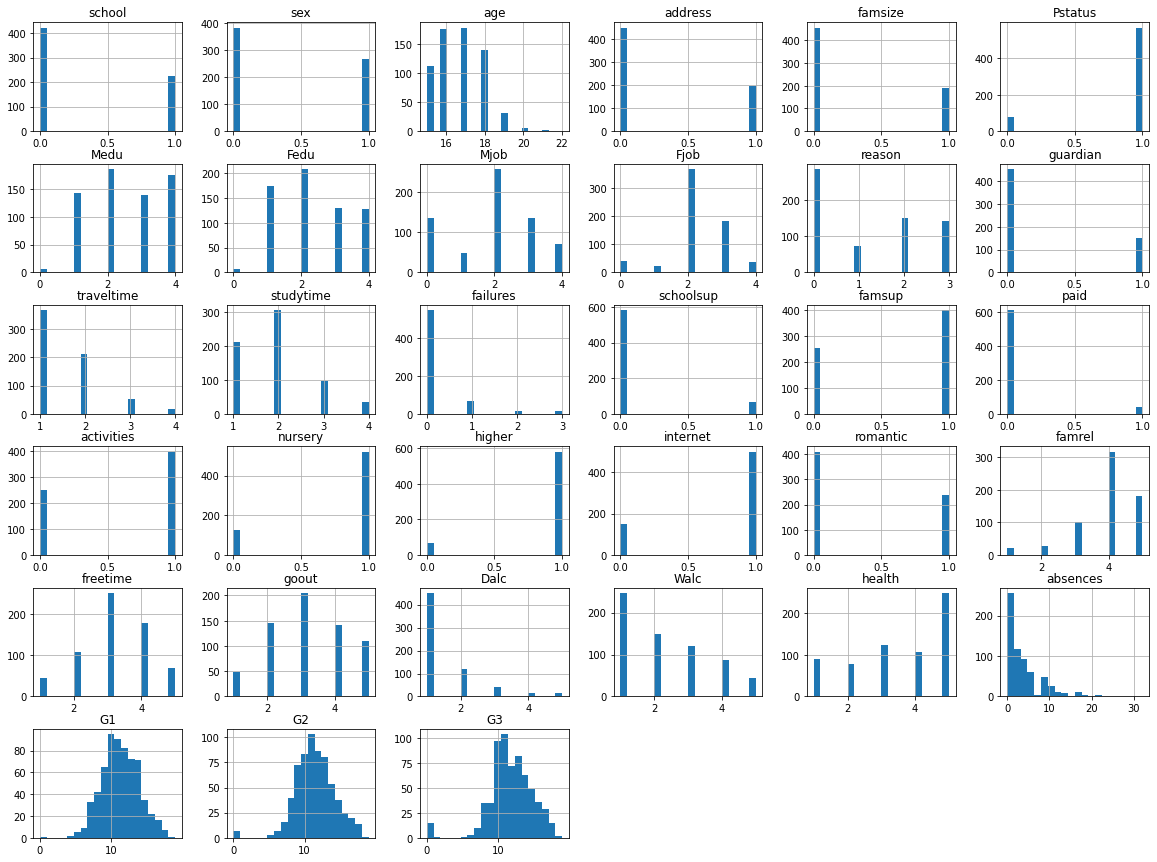

In [ ]:
data_prominent.hist(bins=20, figsize=(20,15));

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

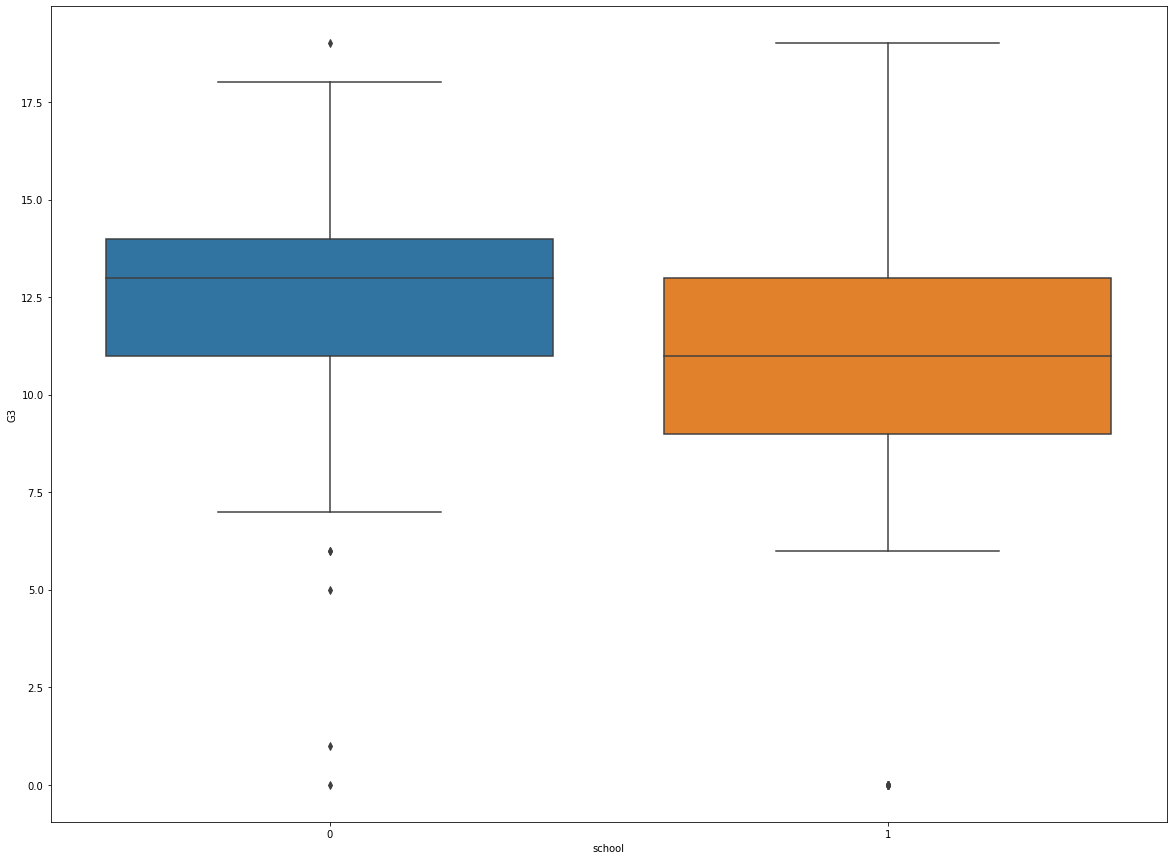

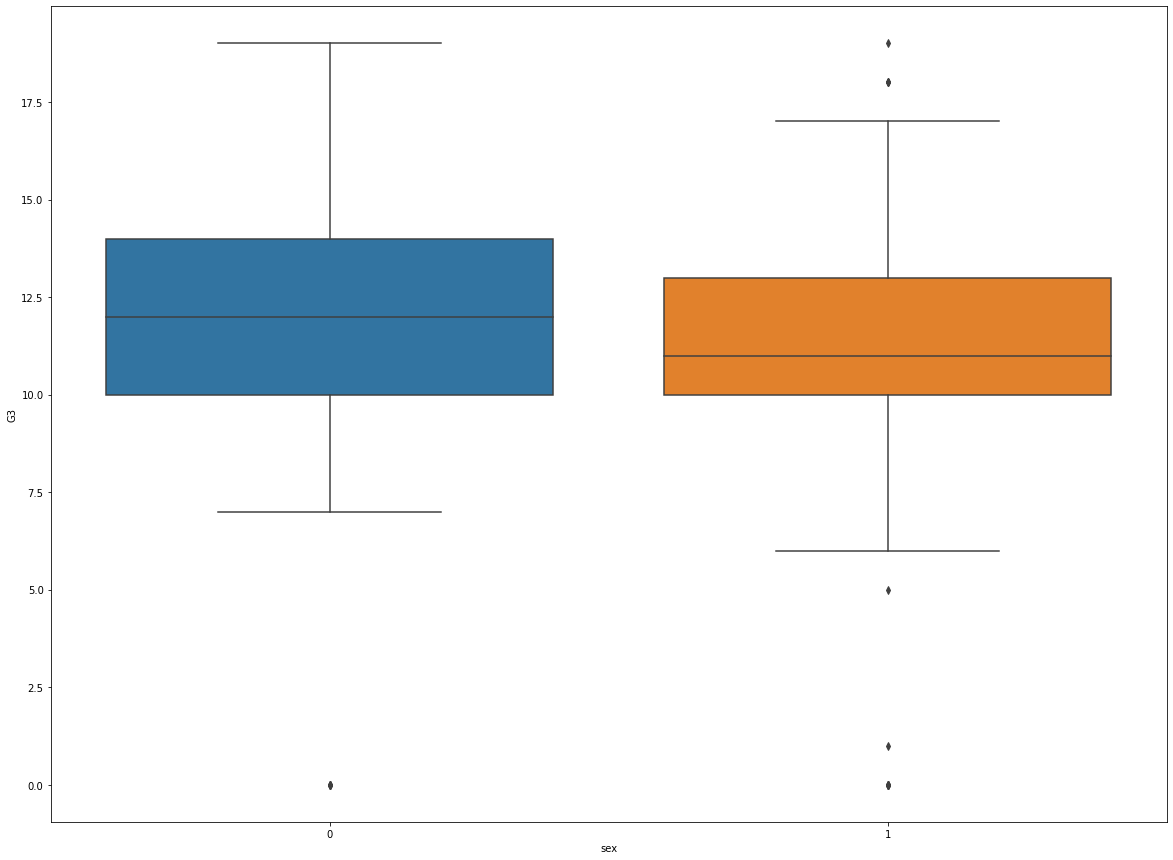

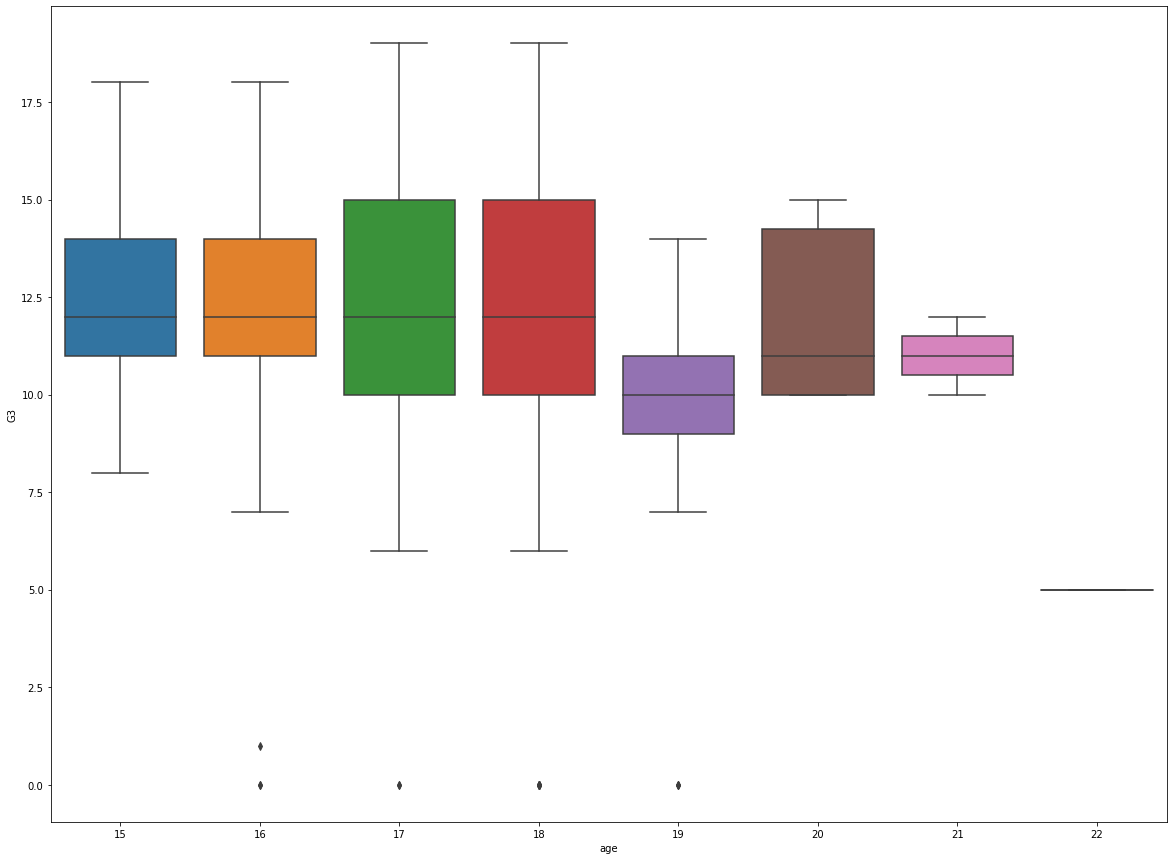

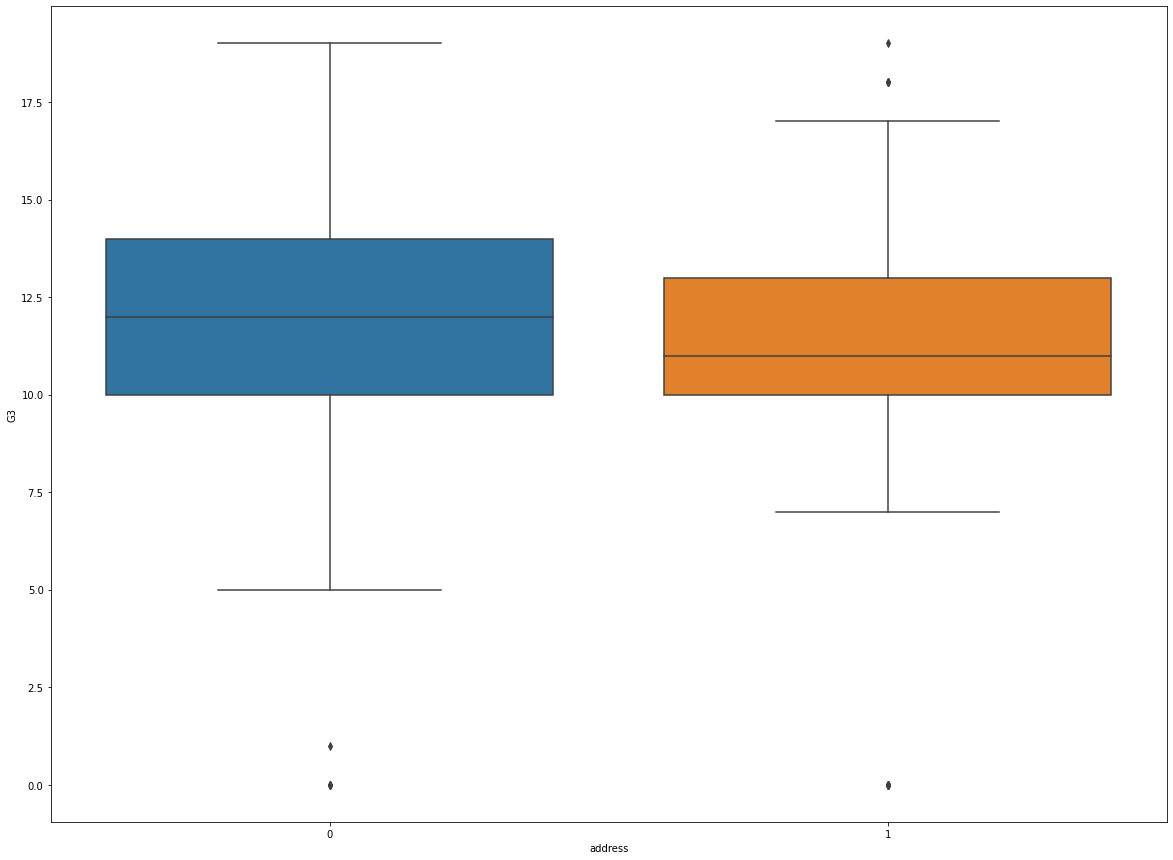

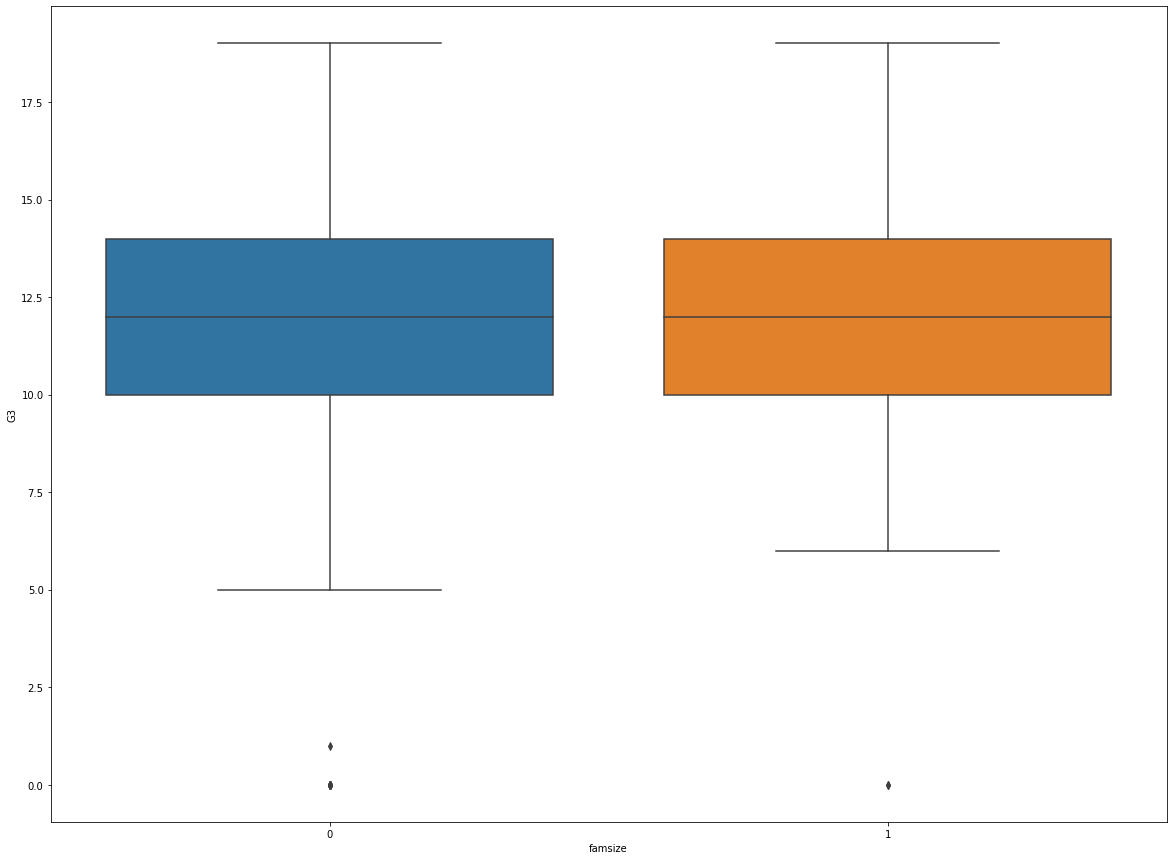

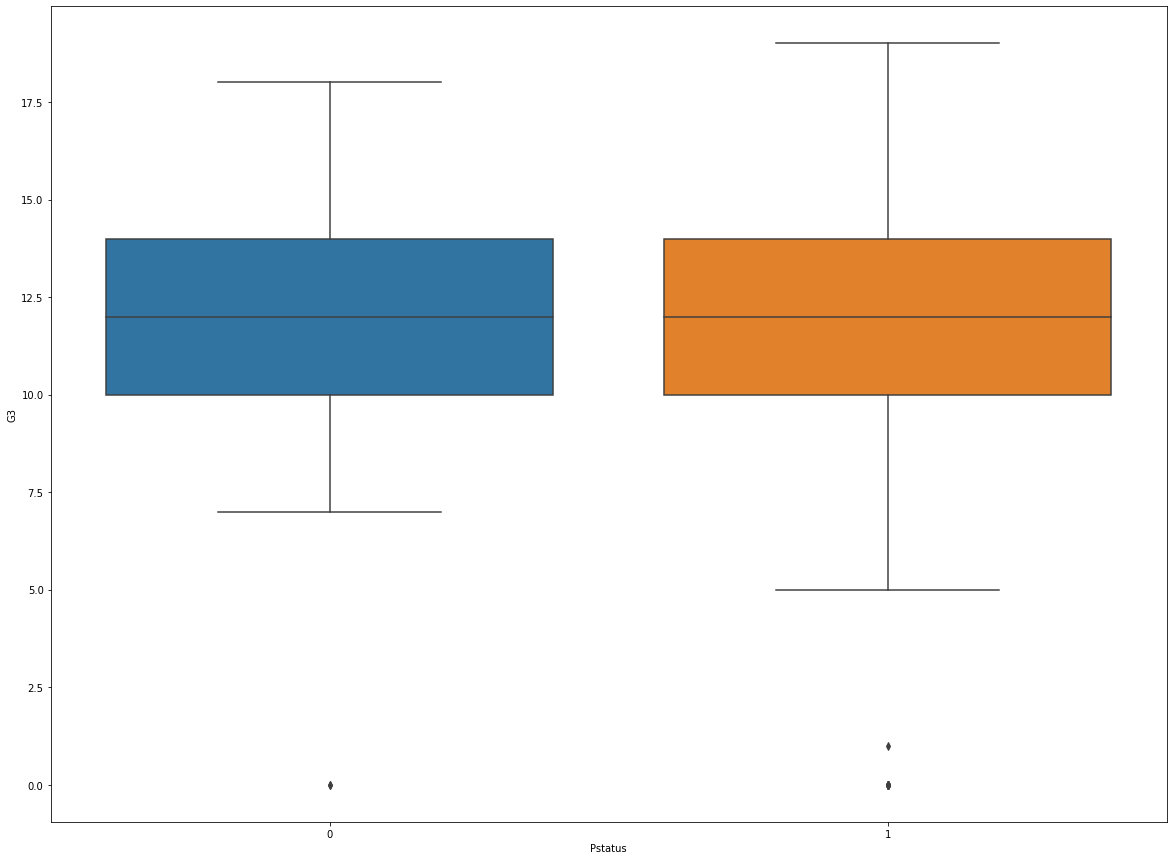

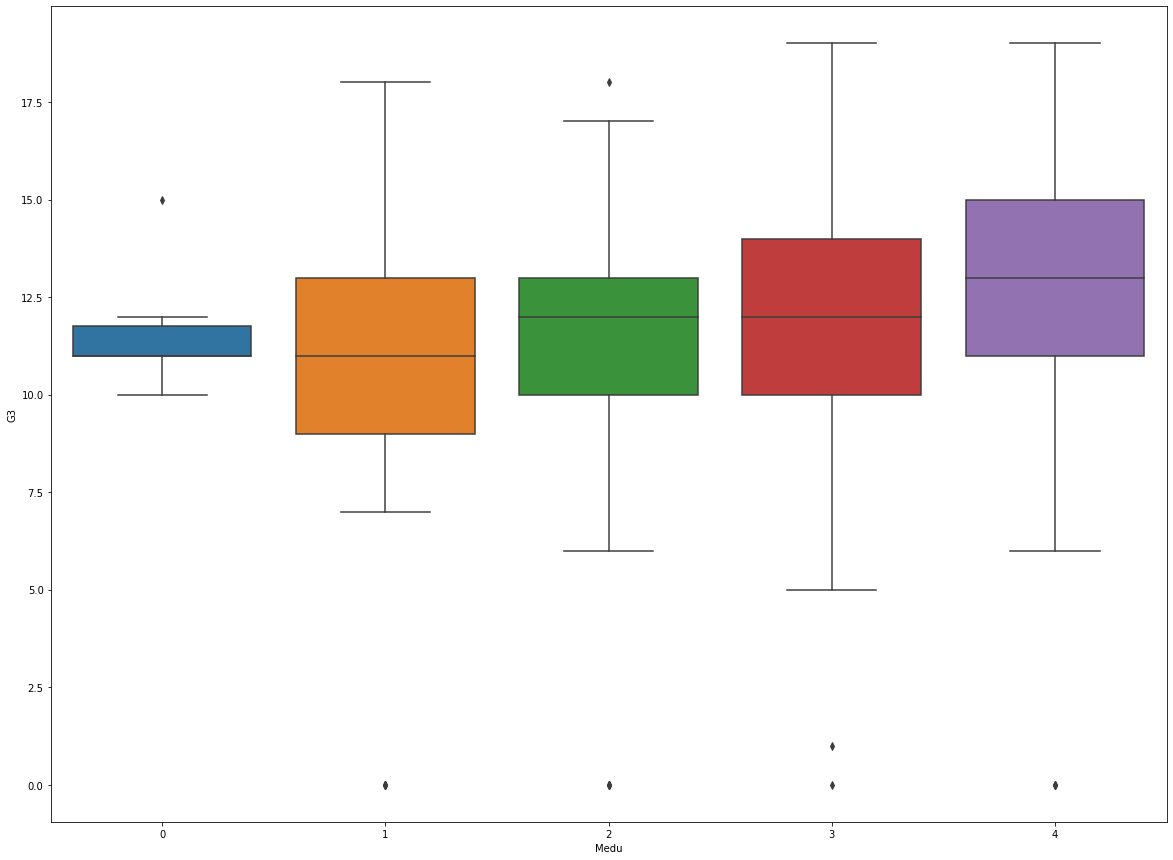

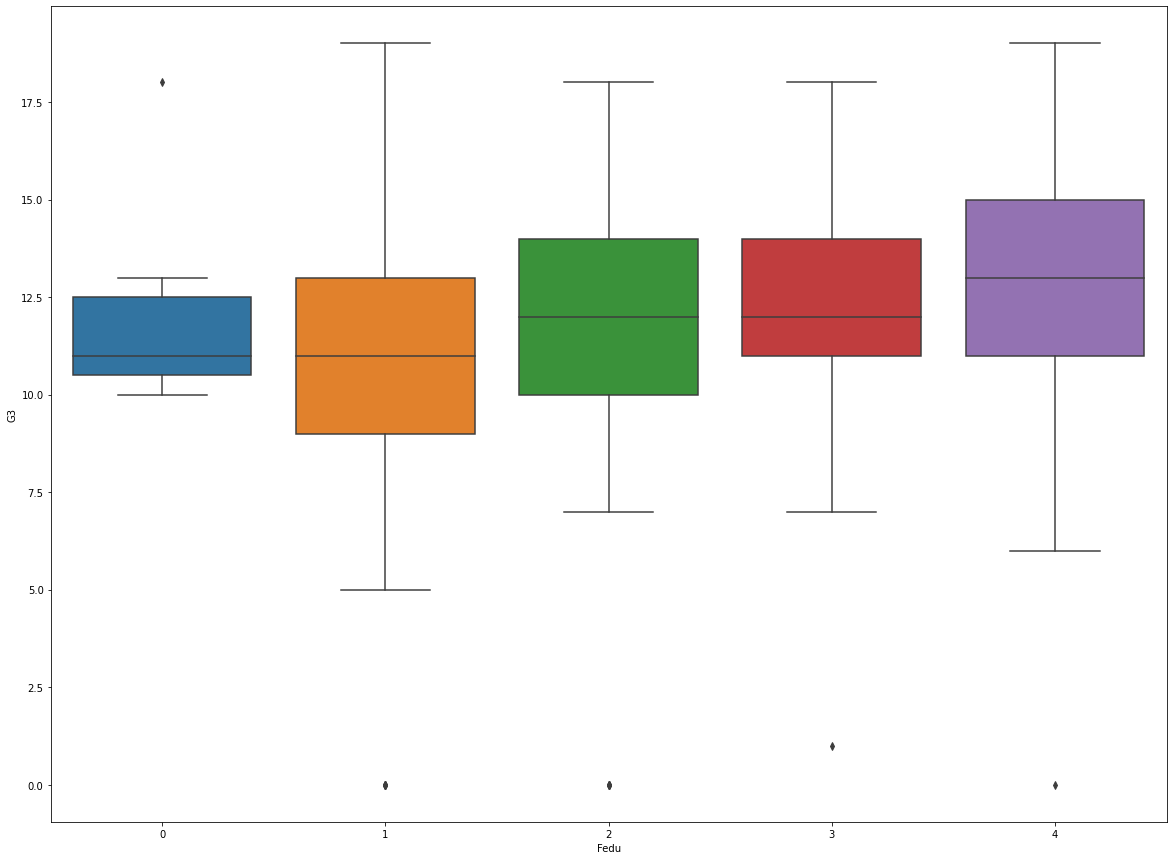

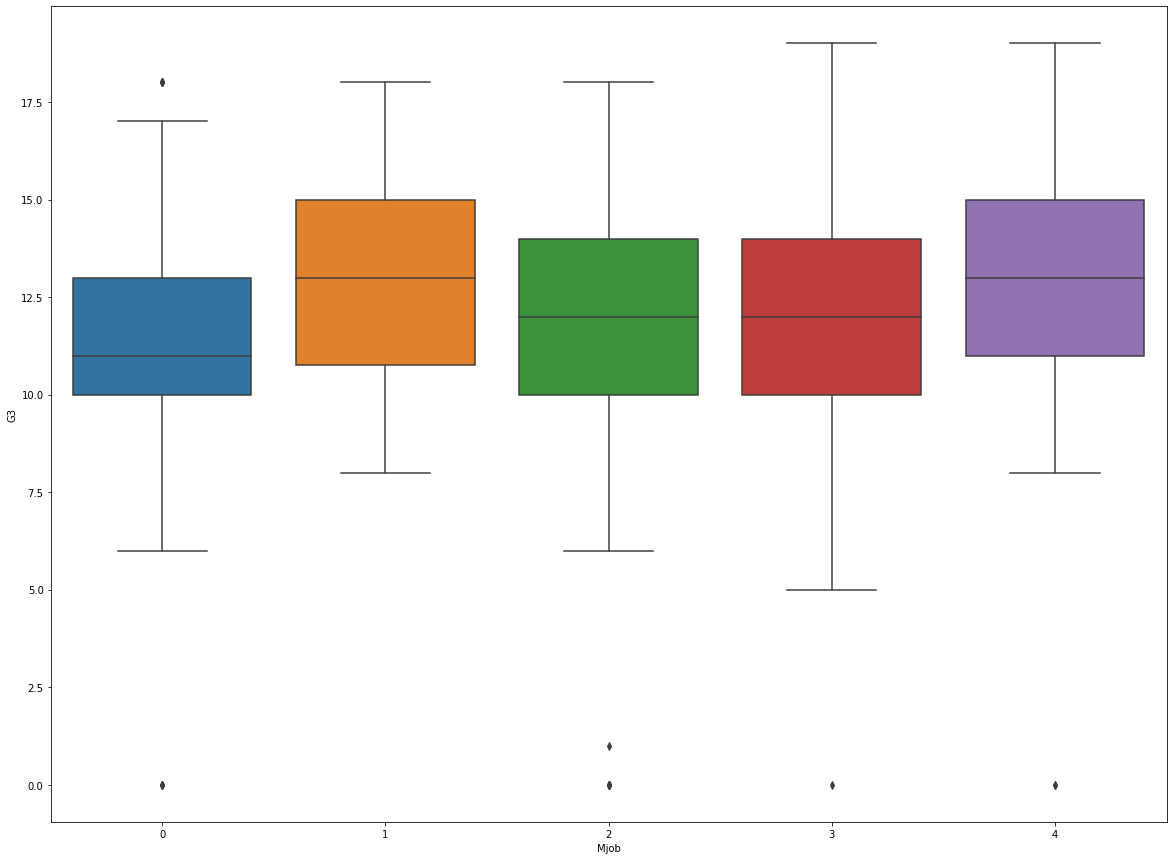

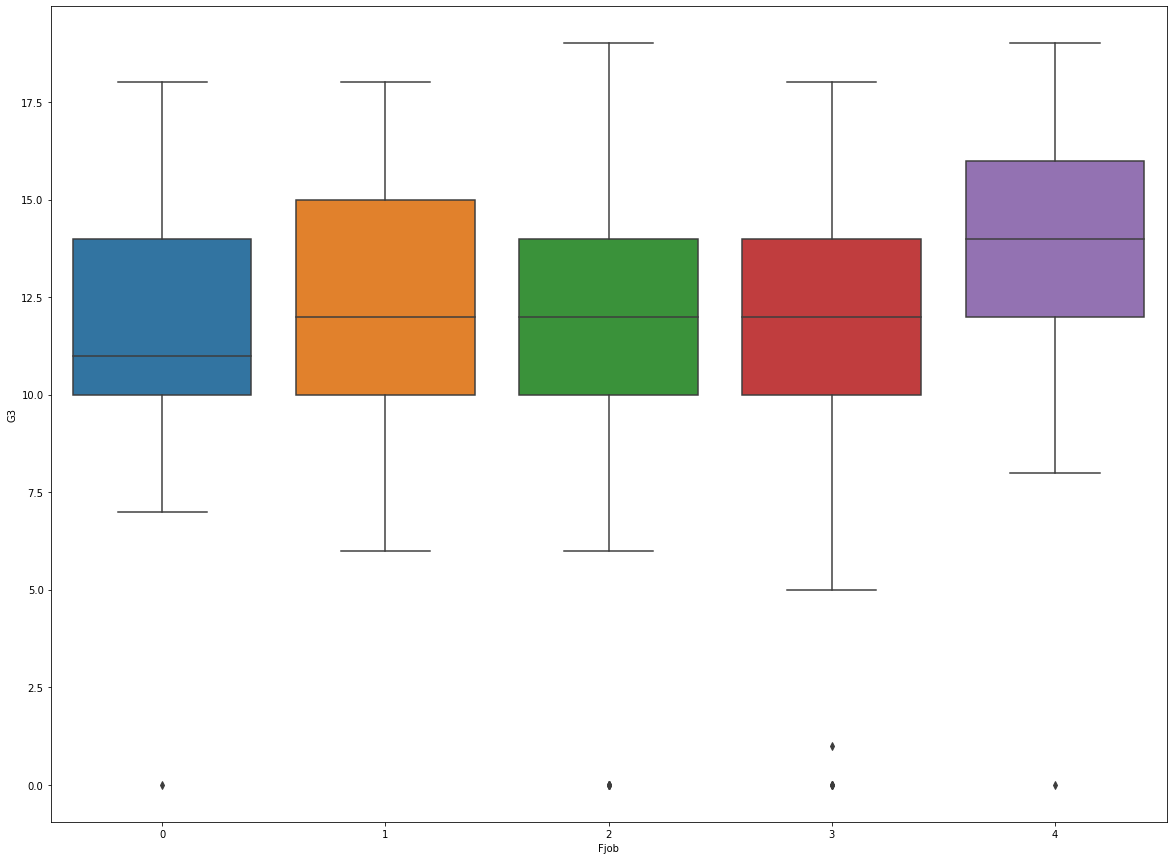

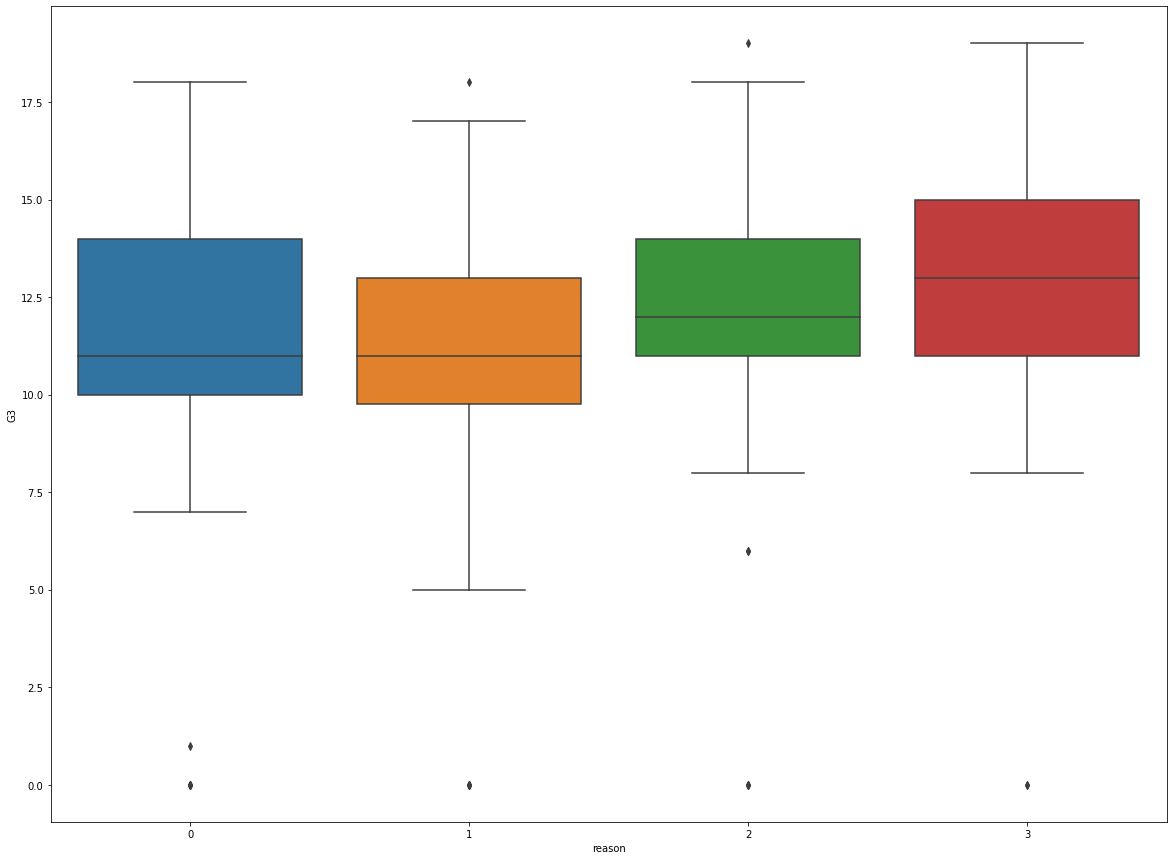

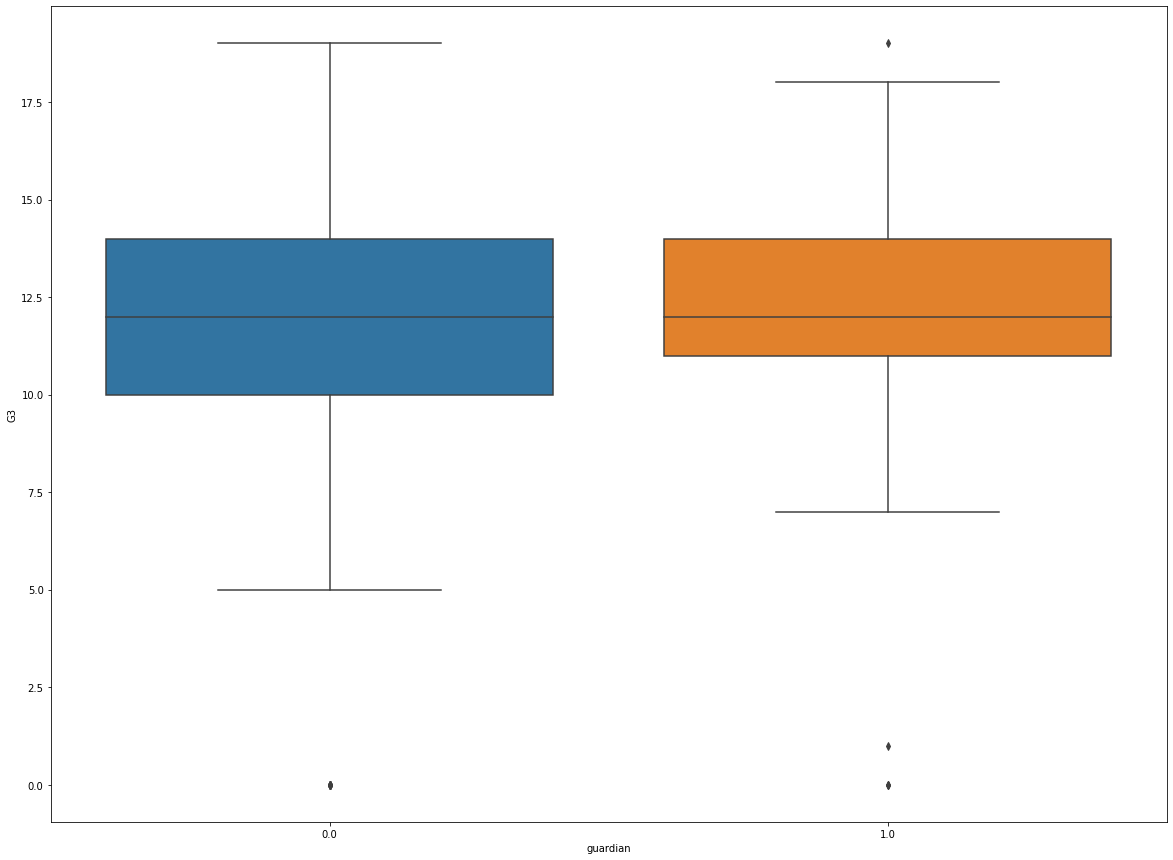

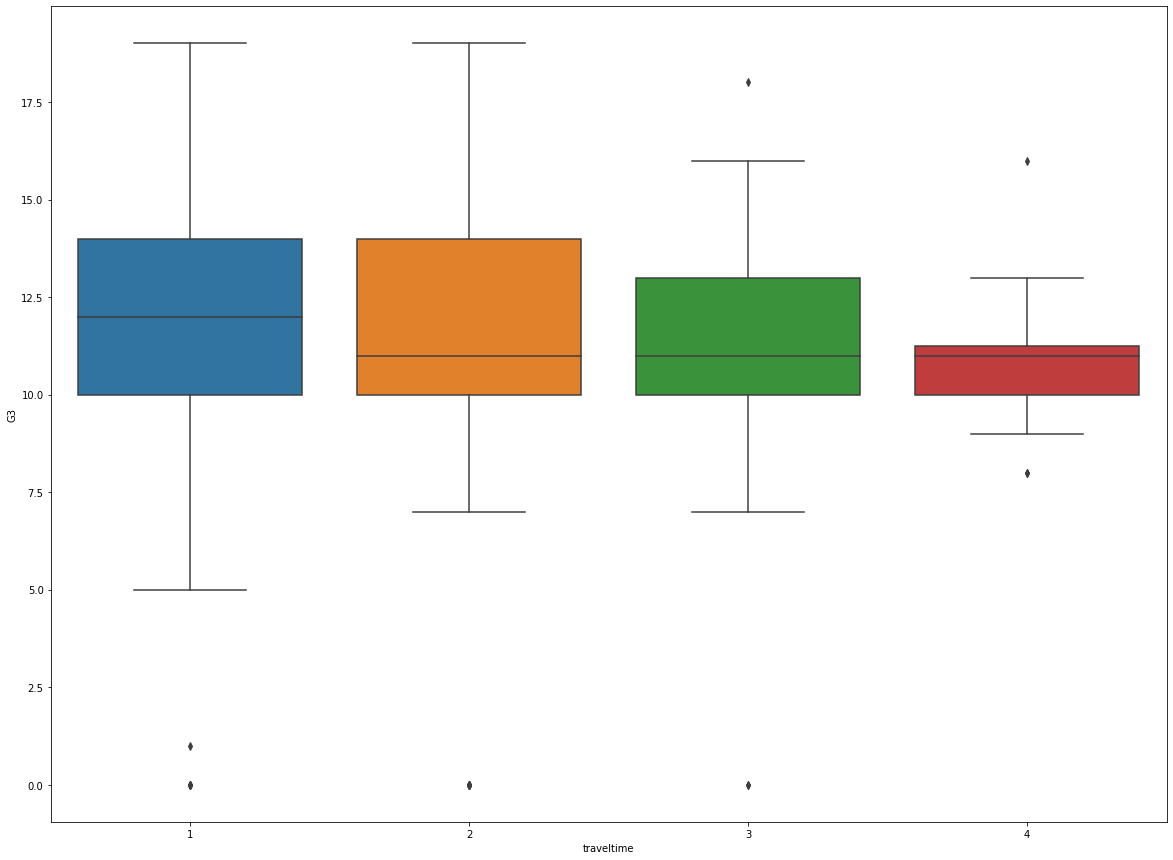

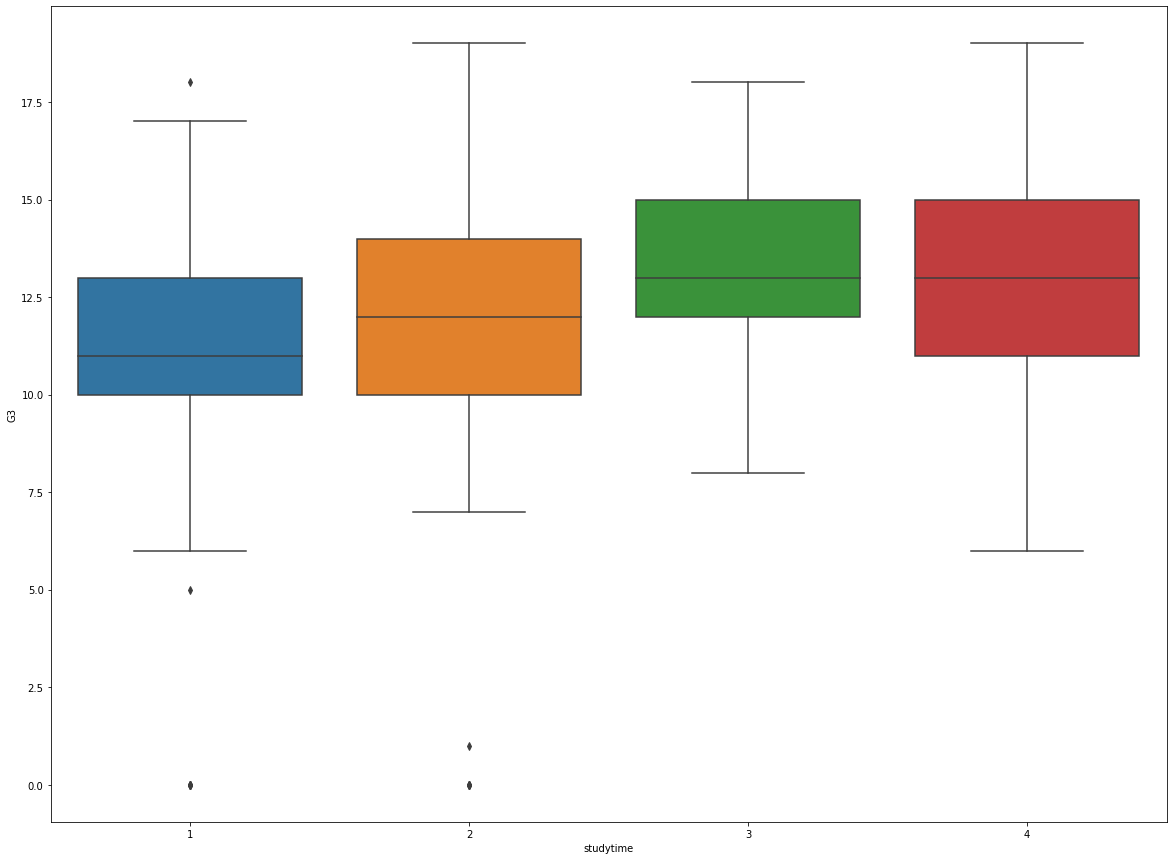

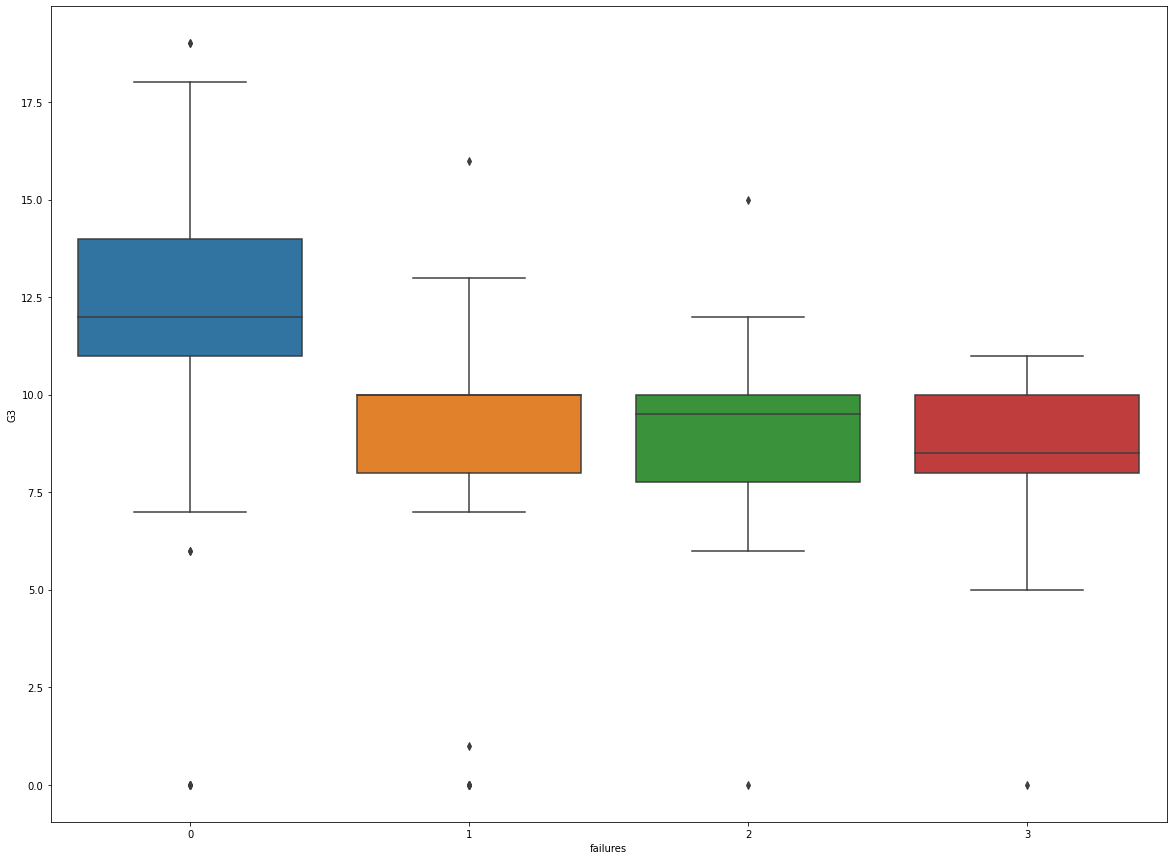

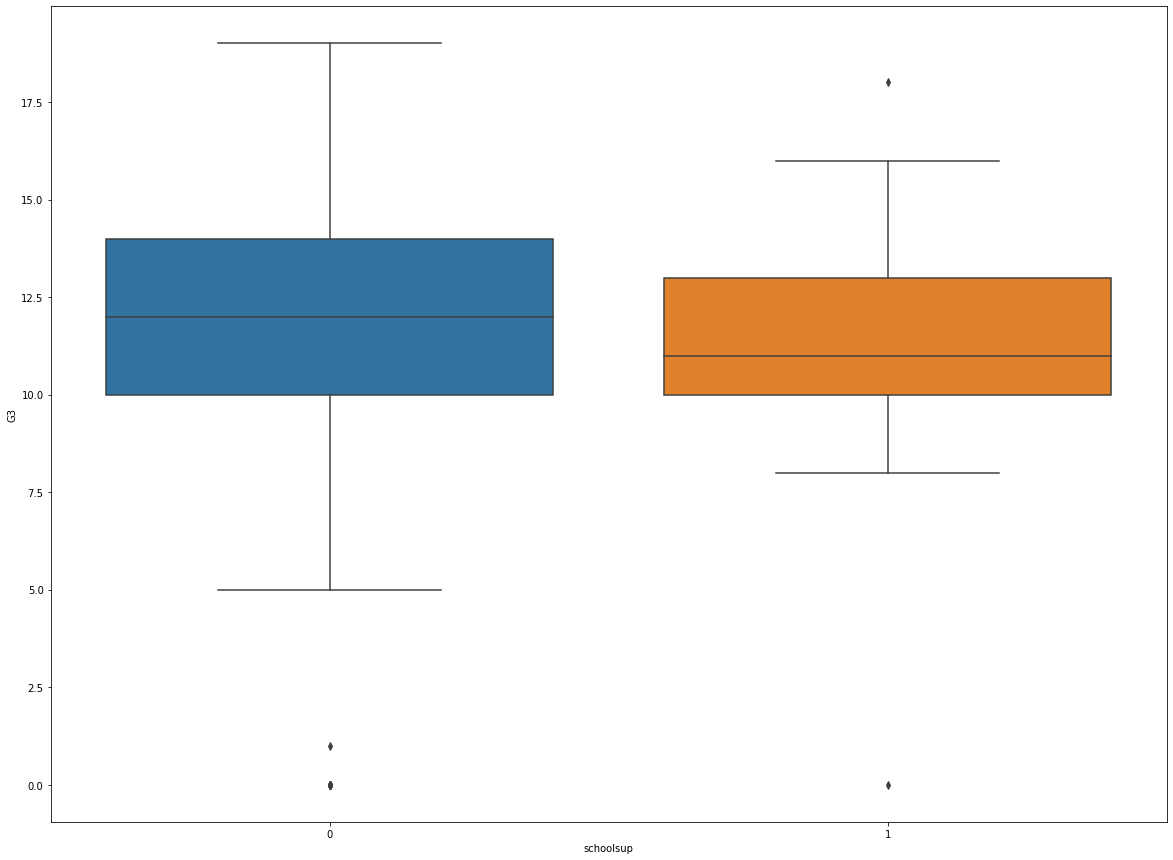

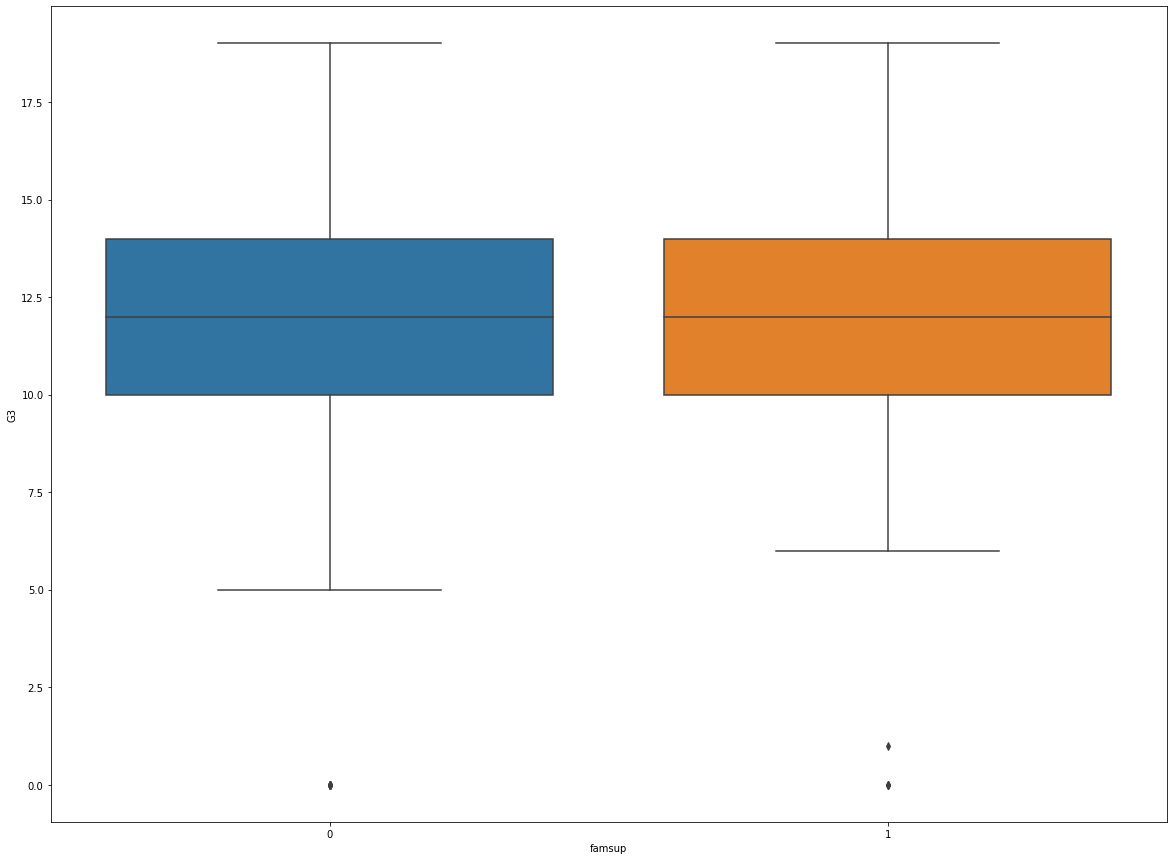

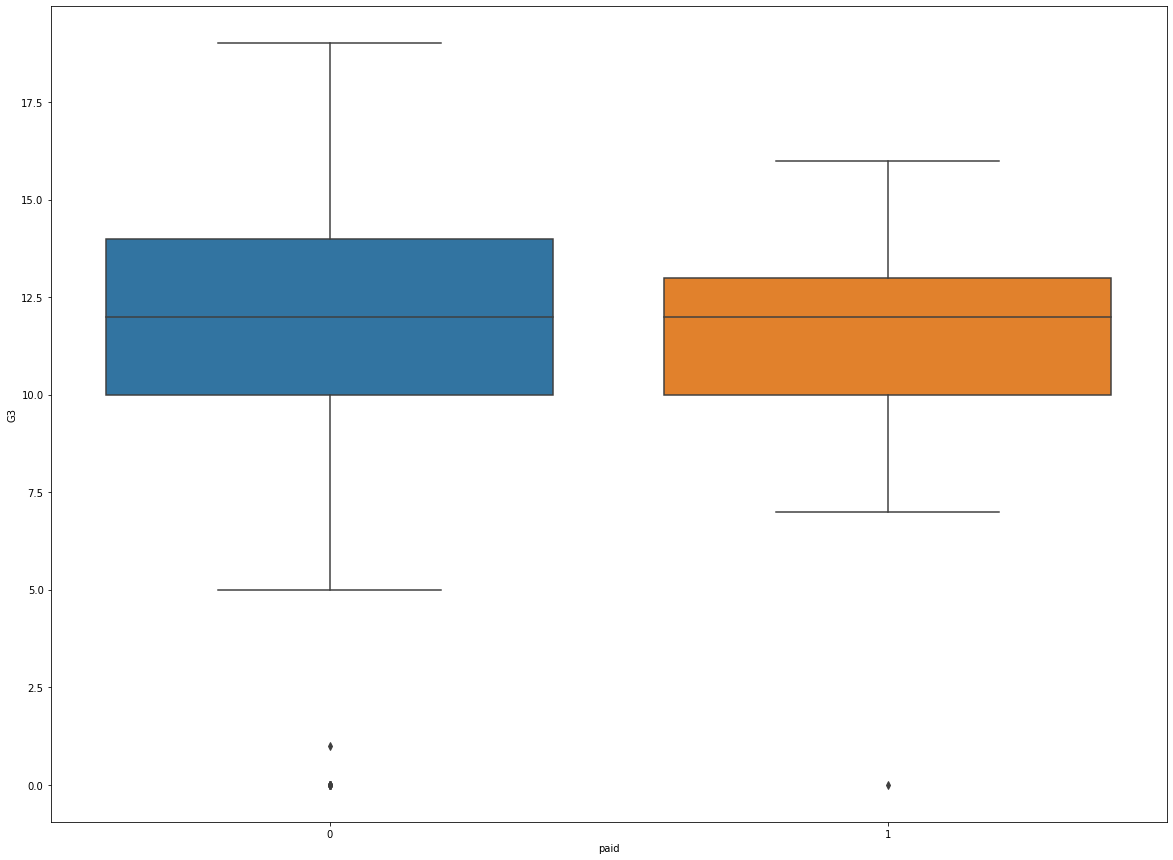

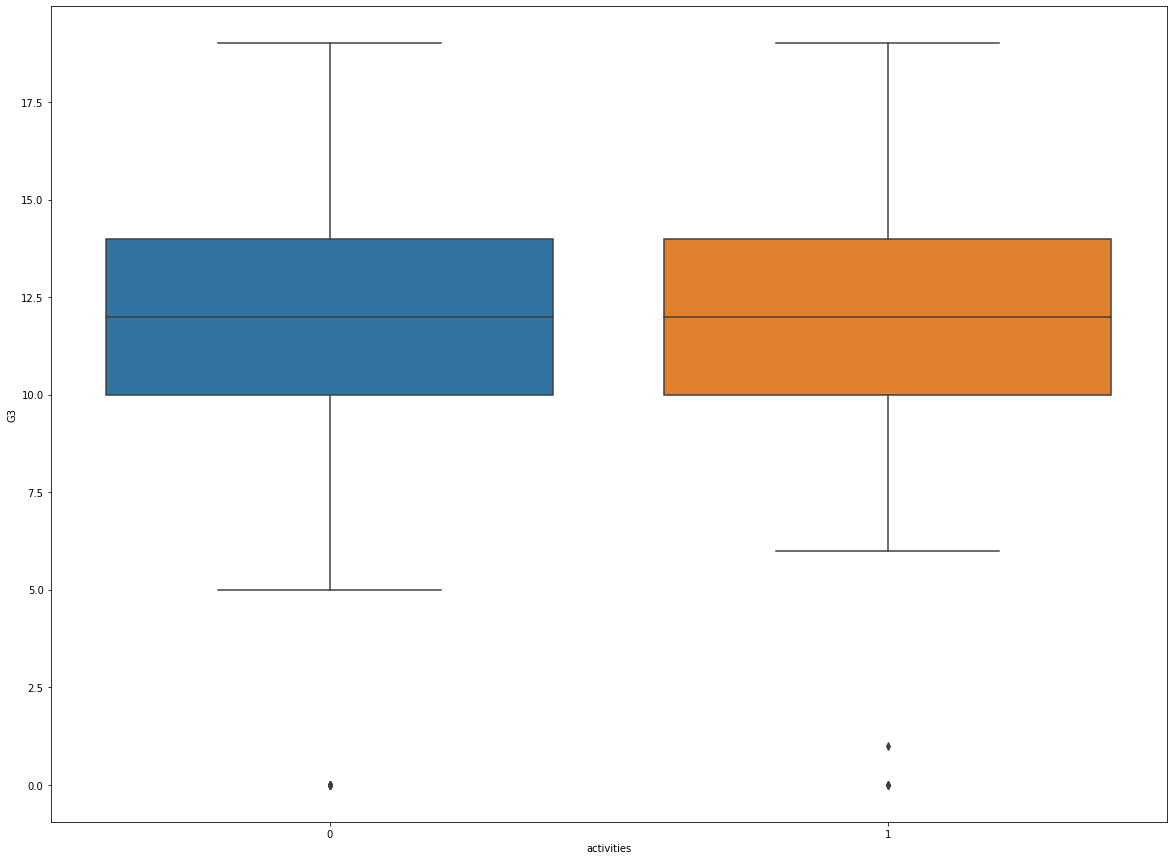

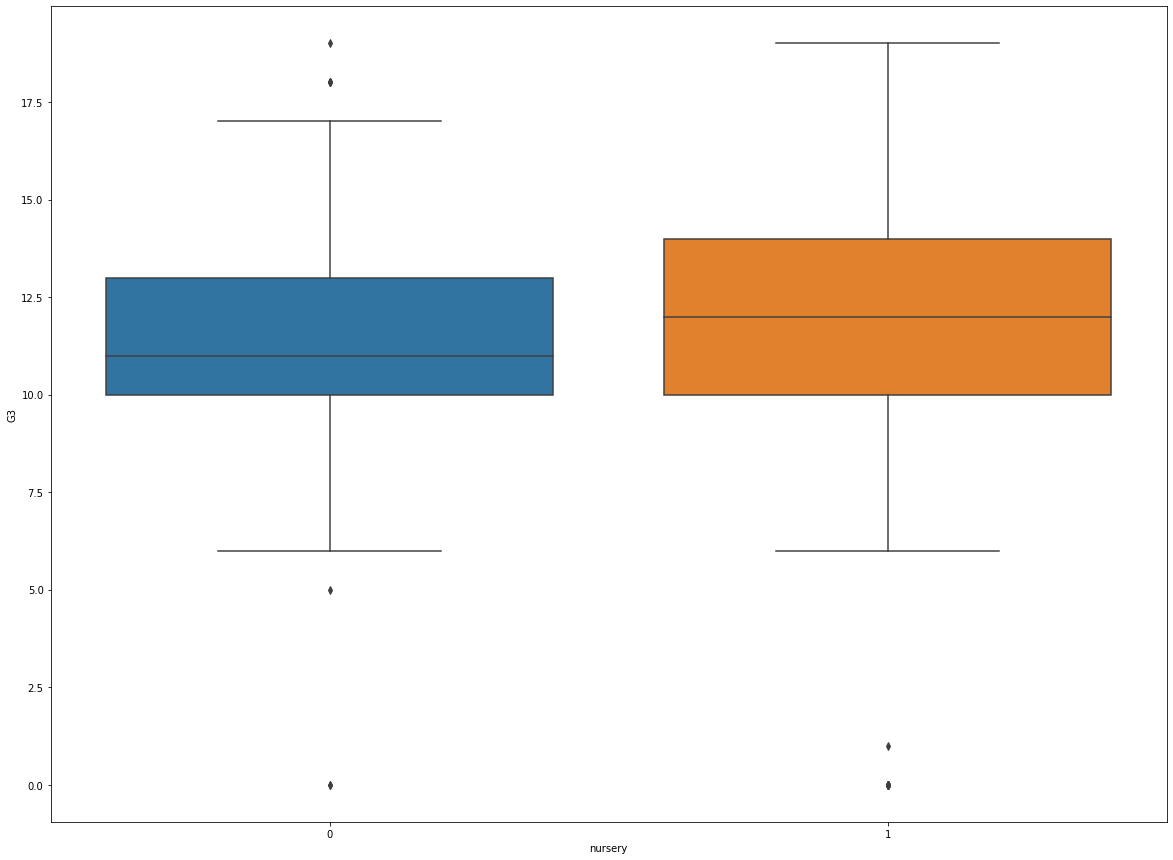

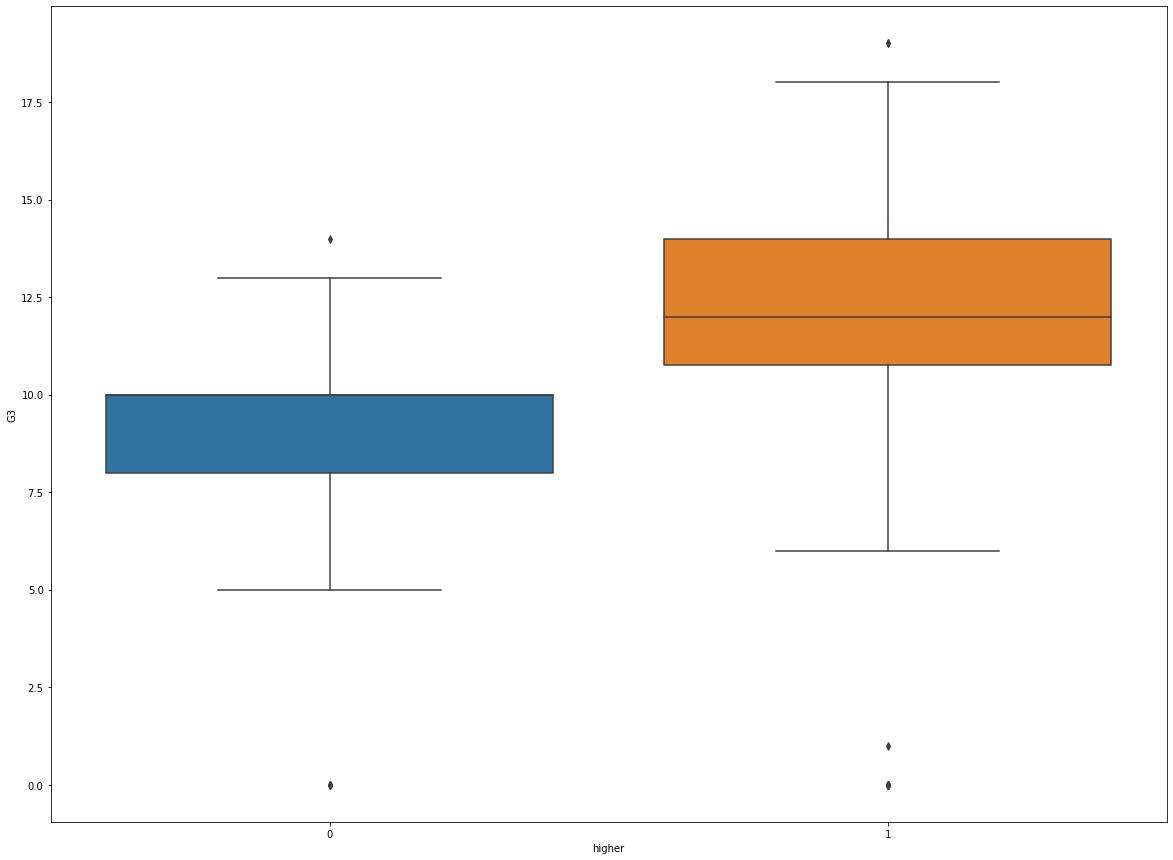

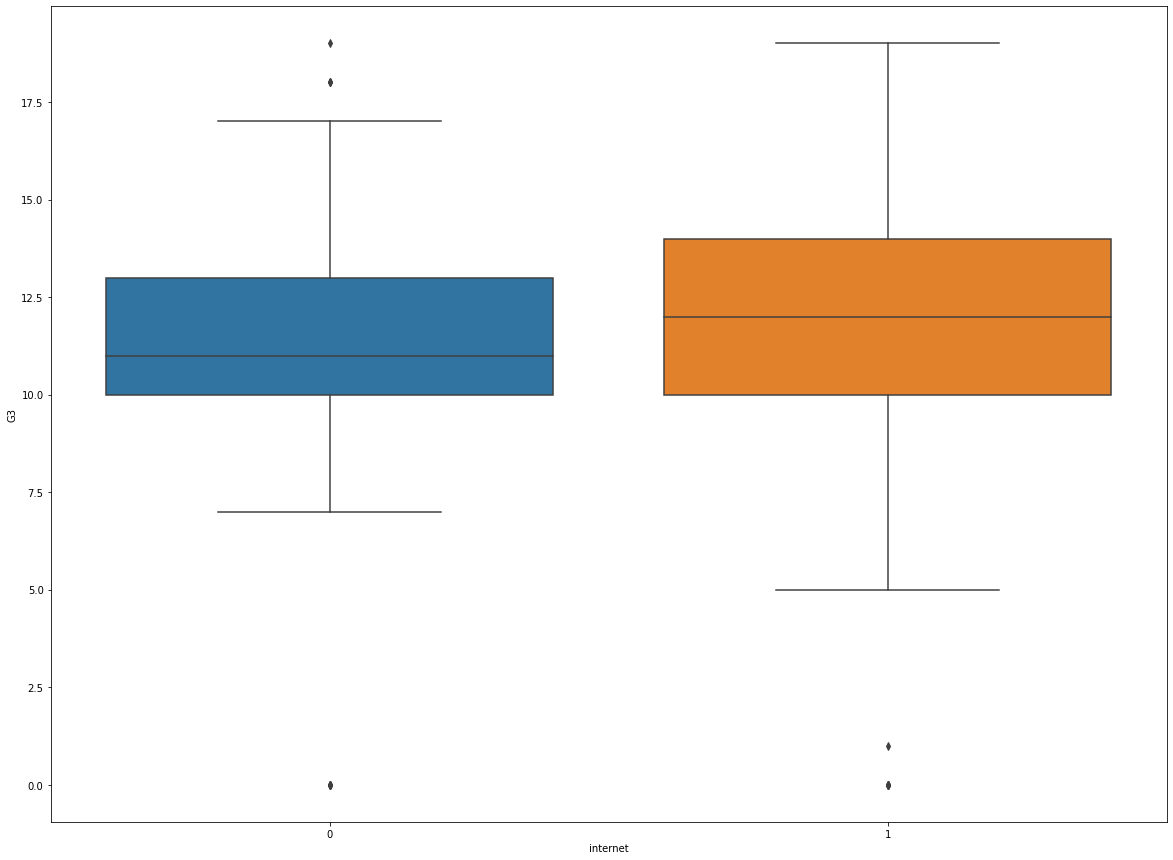

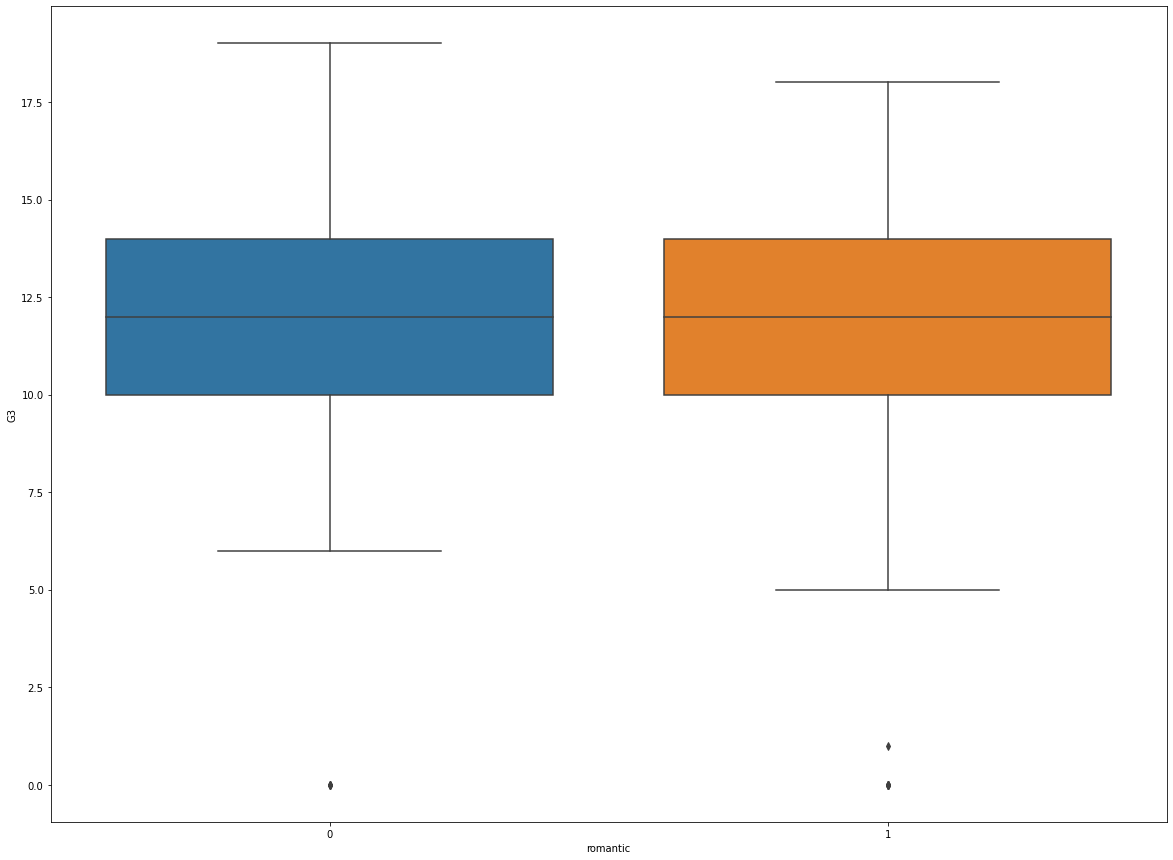

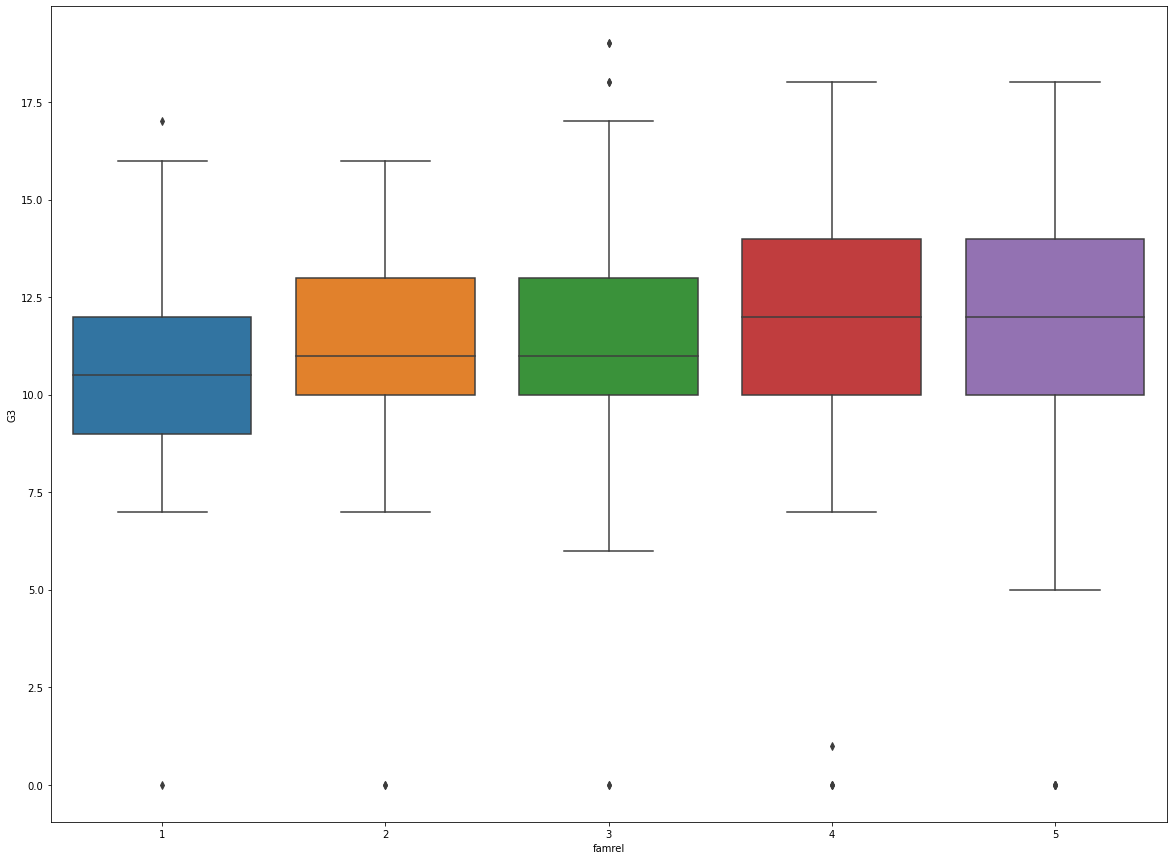

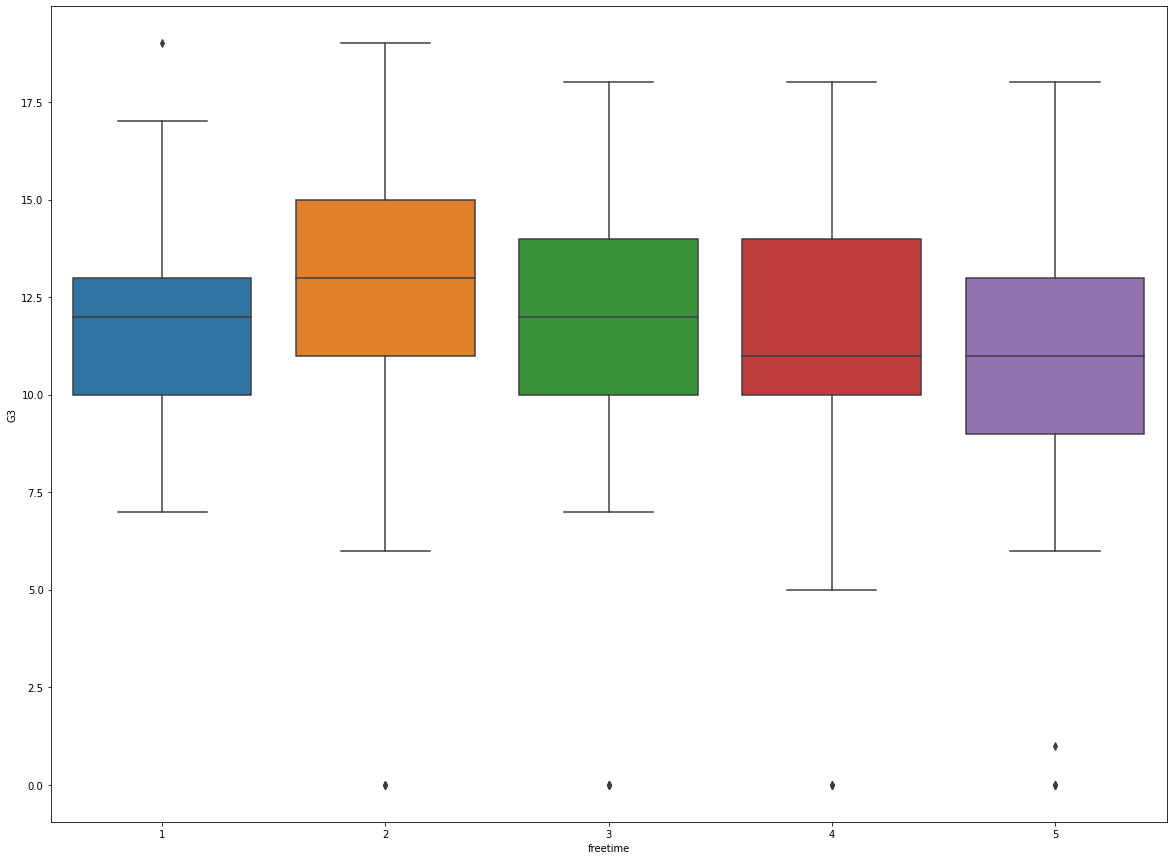

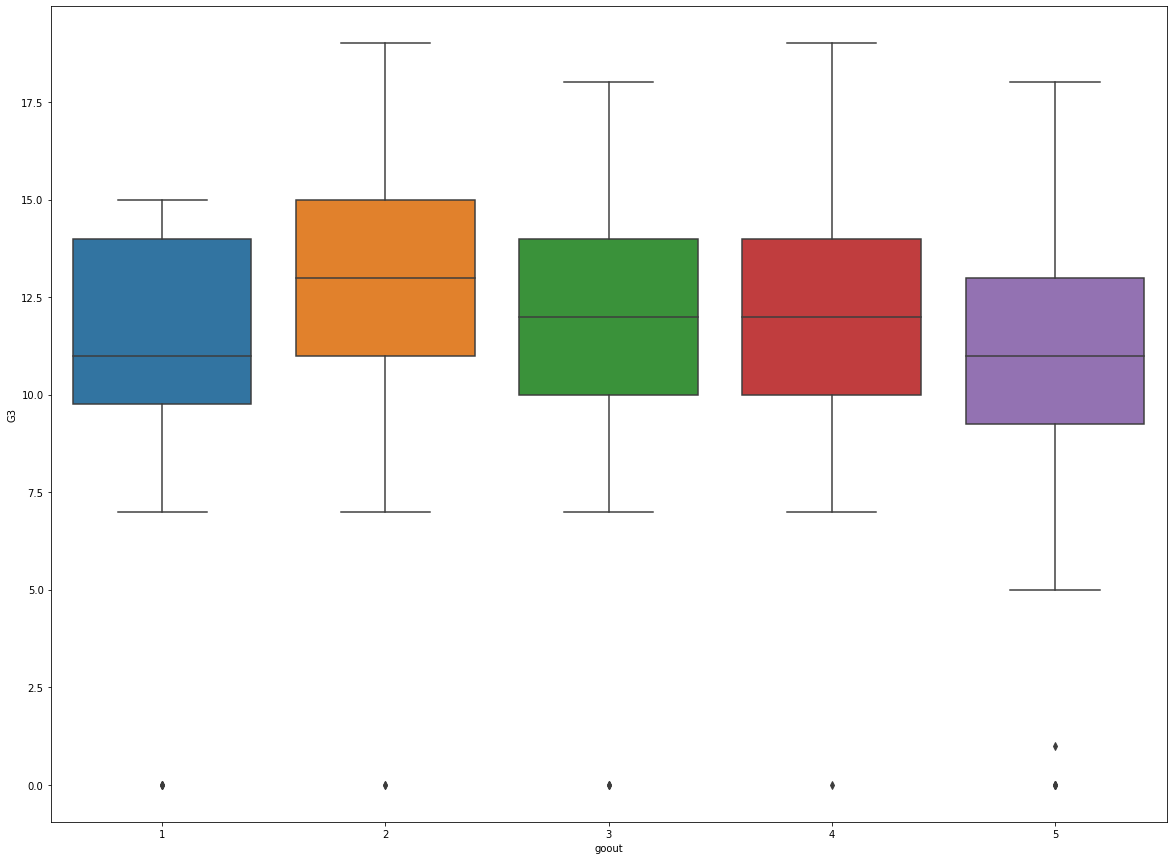

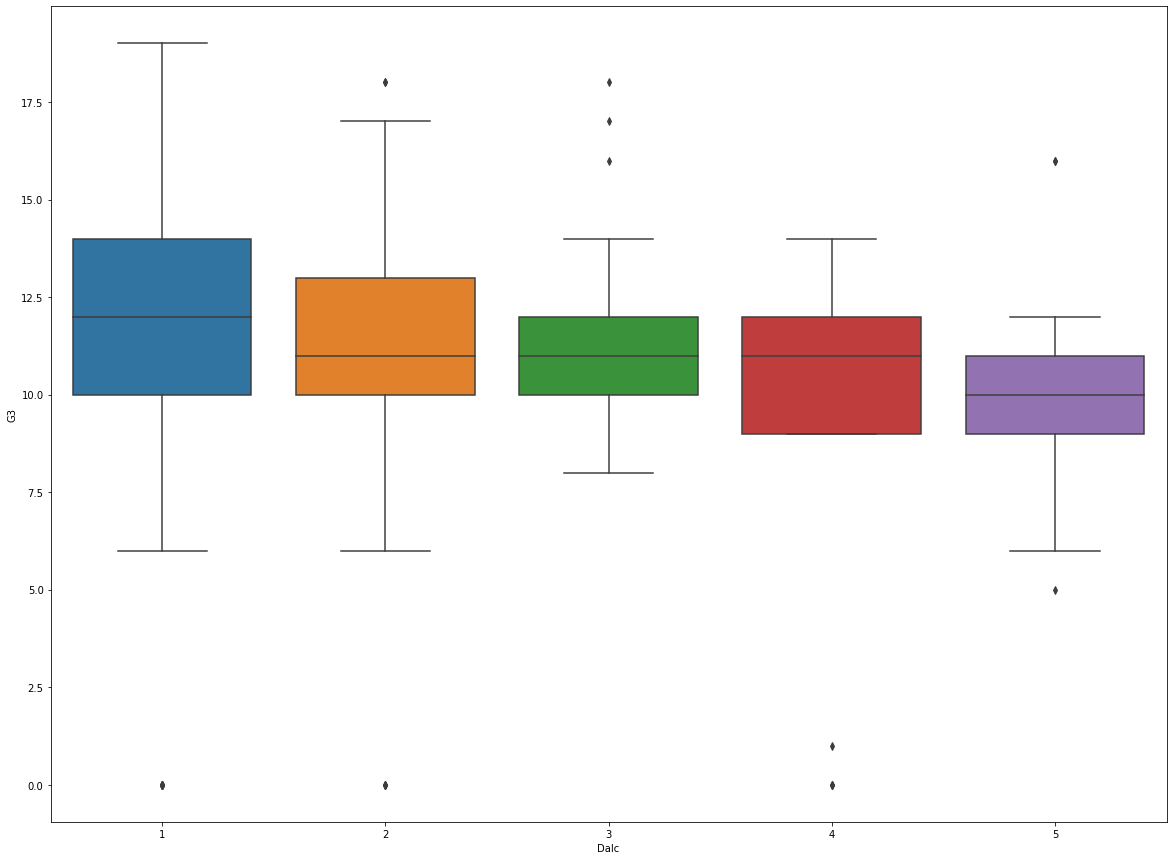

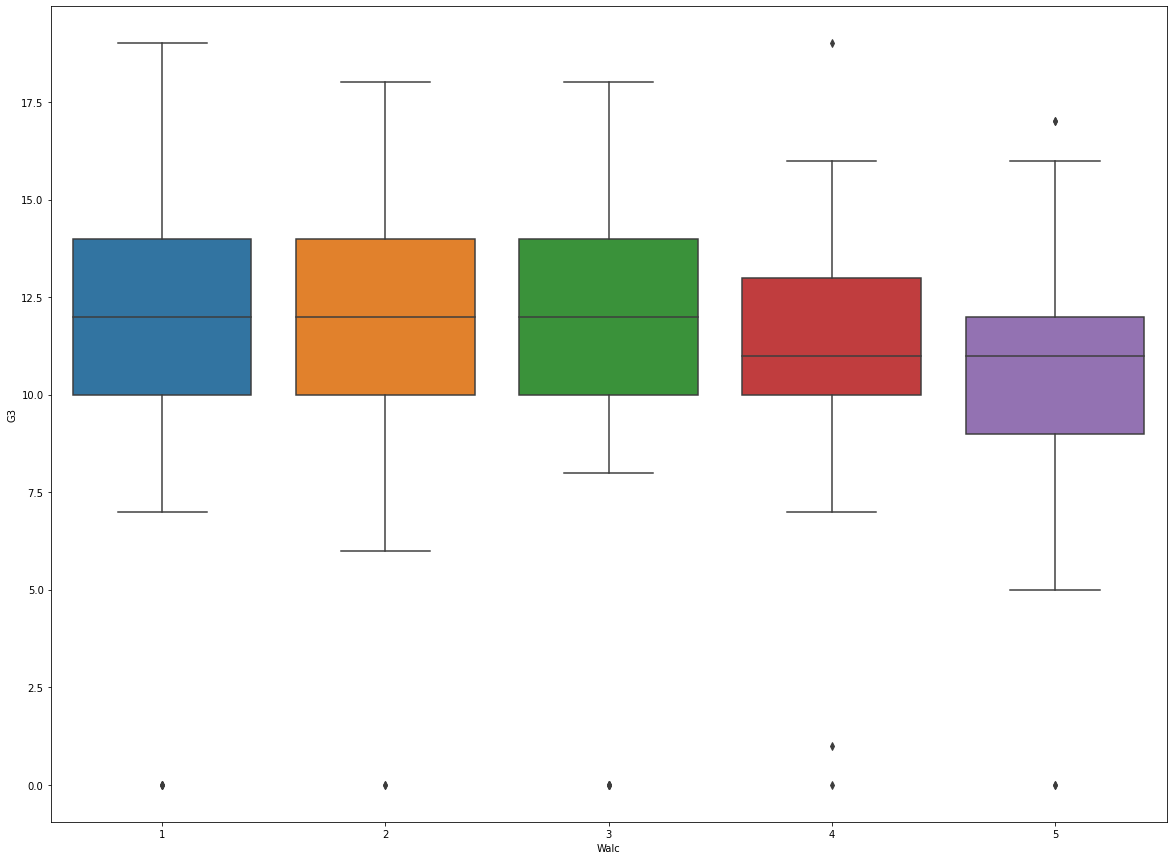

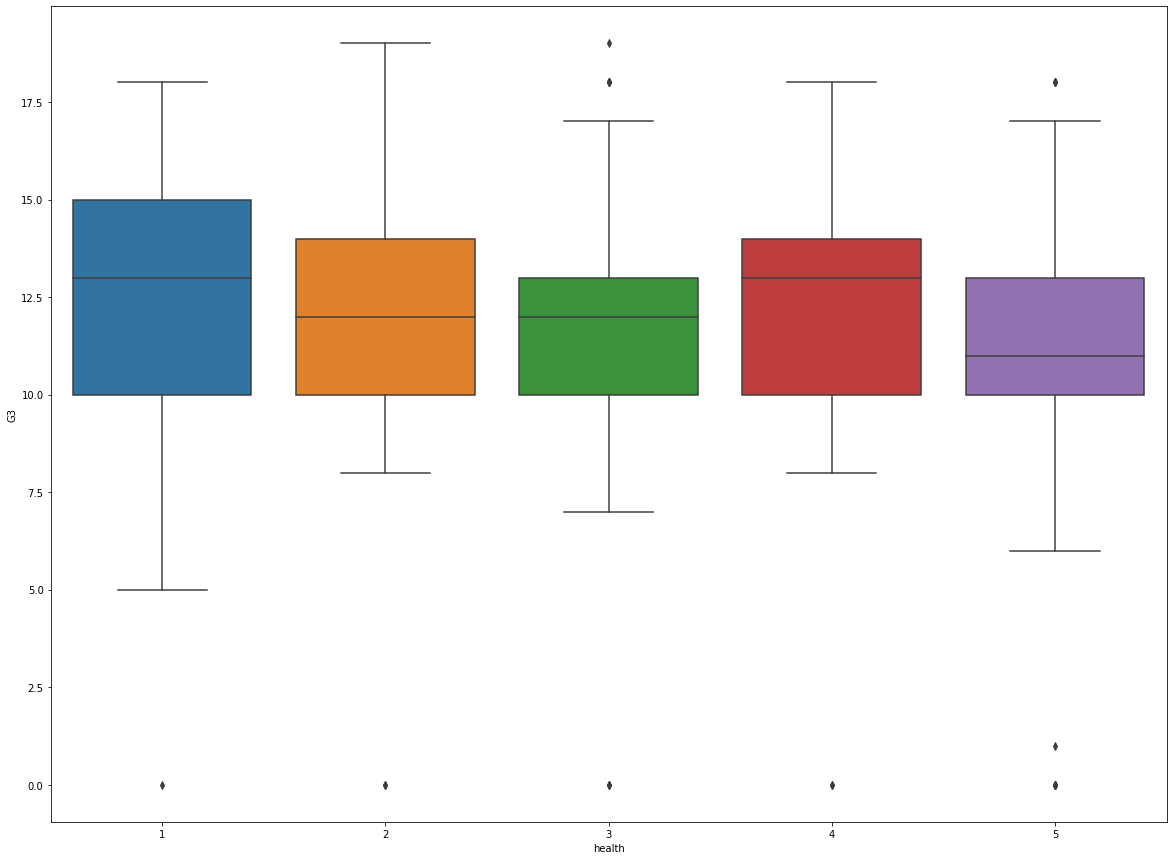

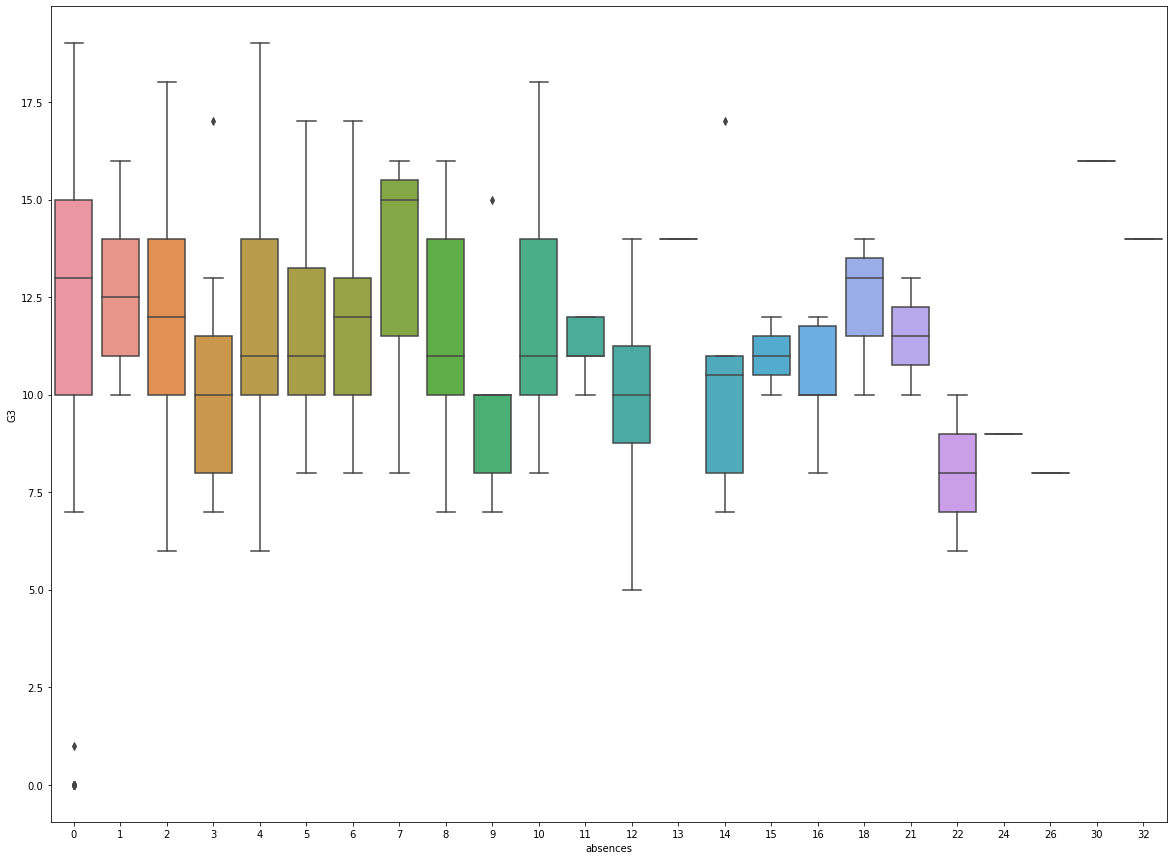

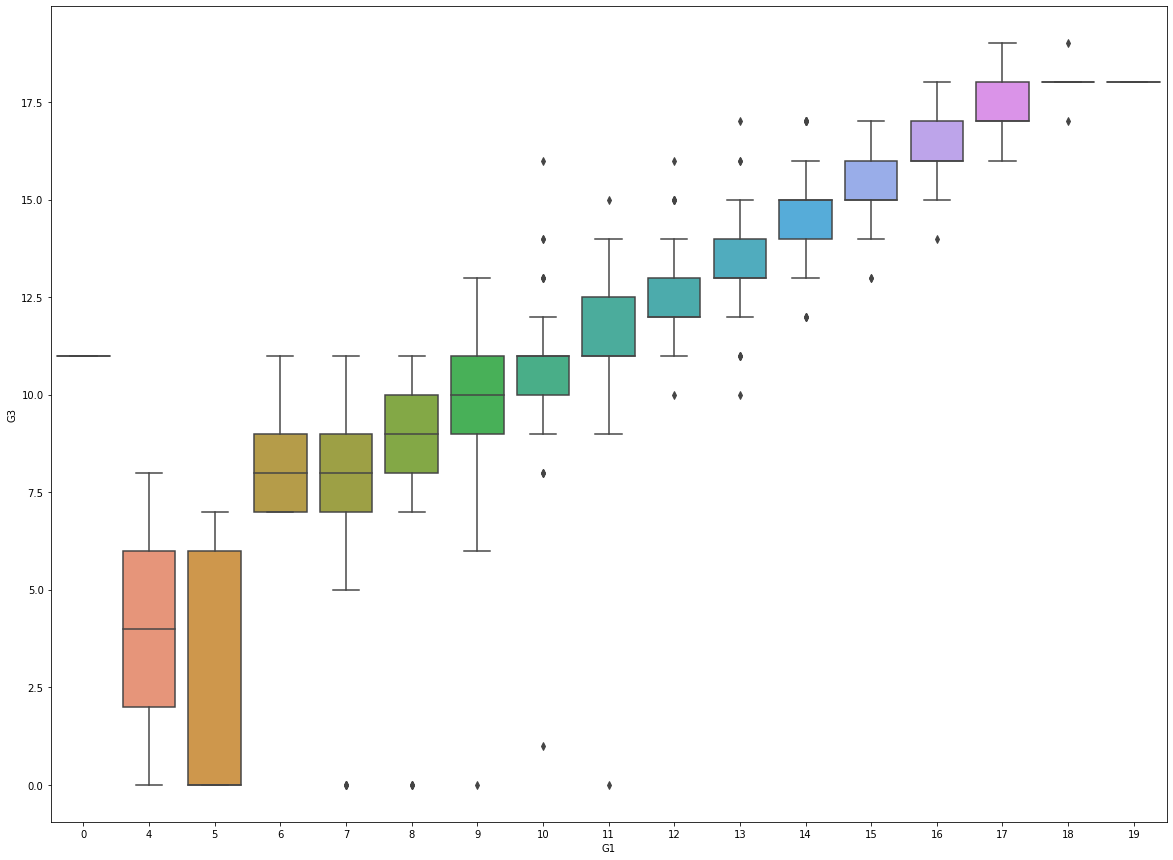

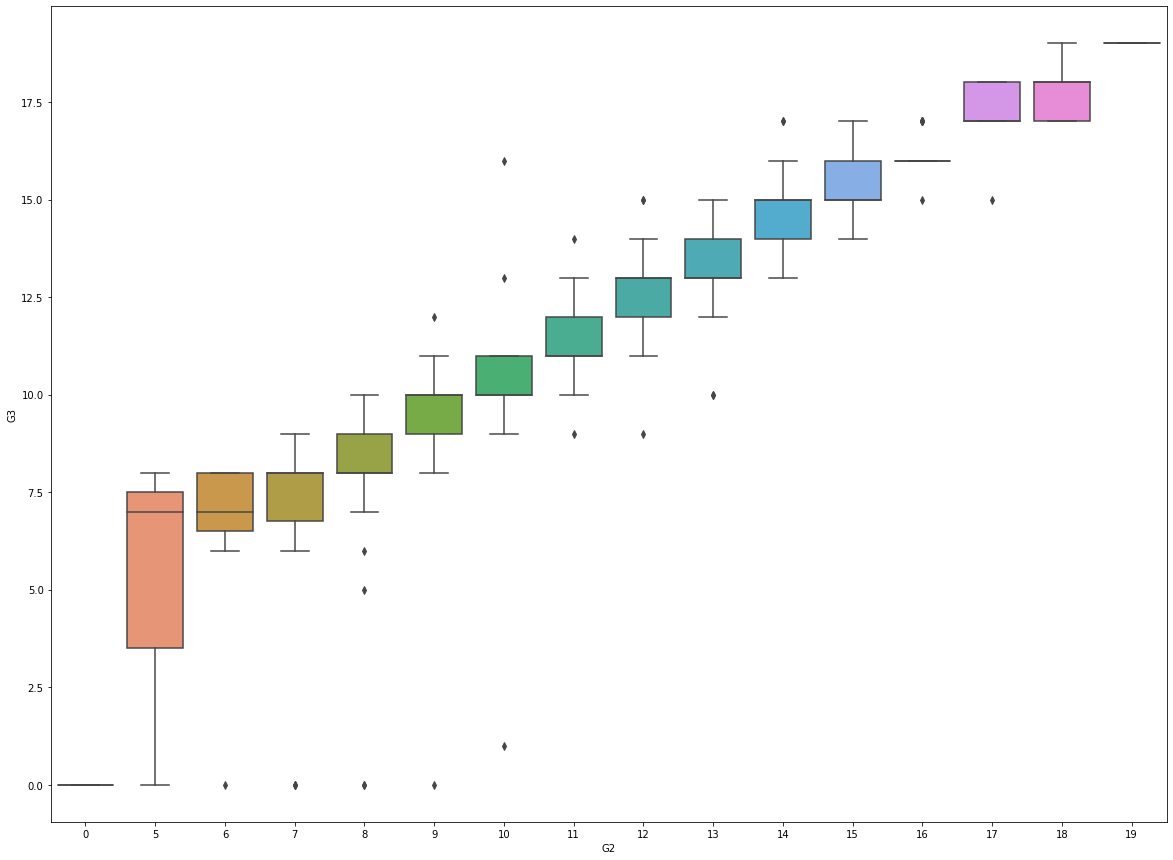

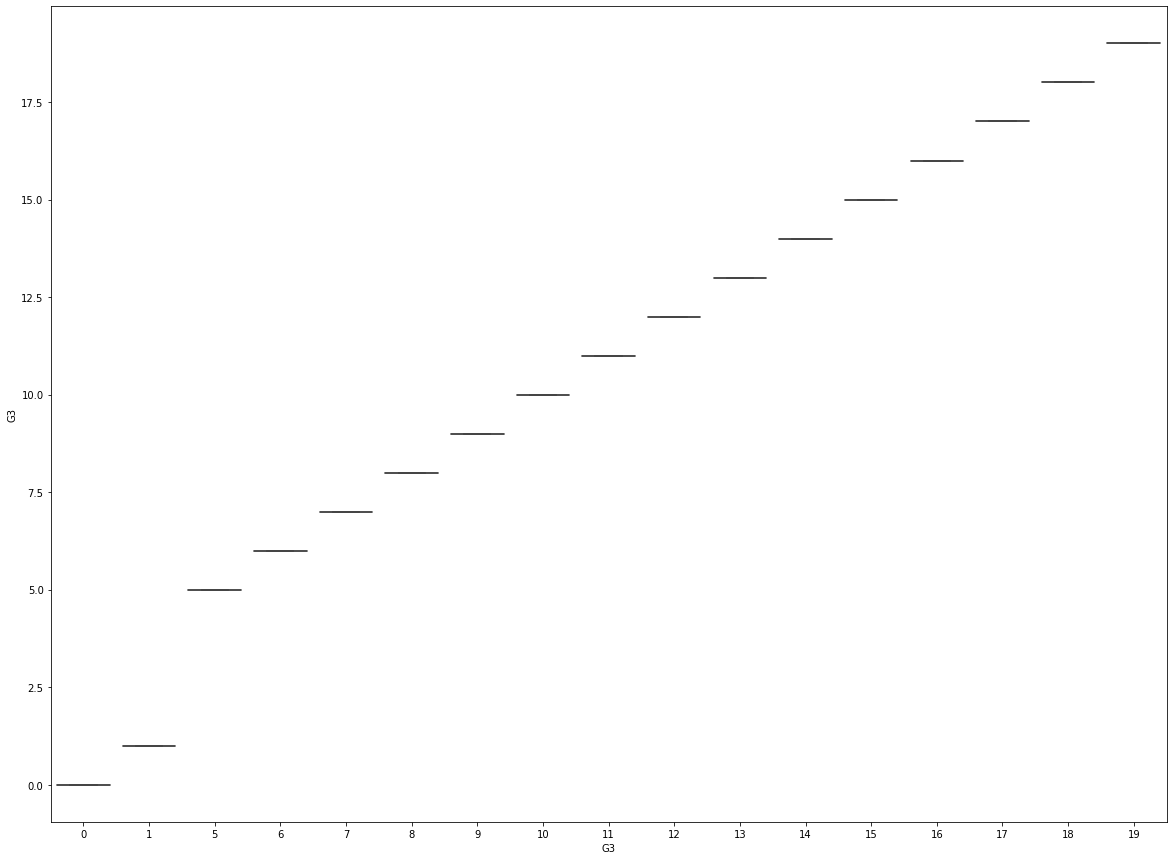

In [ ]:
import matplotlib.pyplot as plt 
for i in data_prominent.columns:
    plt.figure(figsize=(20,15));
    sns.boxplot(x=i, y="G3", data=data_prominent);

# **REGRESION LINEAL**

In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Student_Performance.csv']))

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Text(0.5, 1.0, 'Heatmap for Correllation')

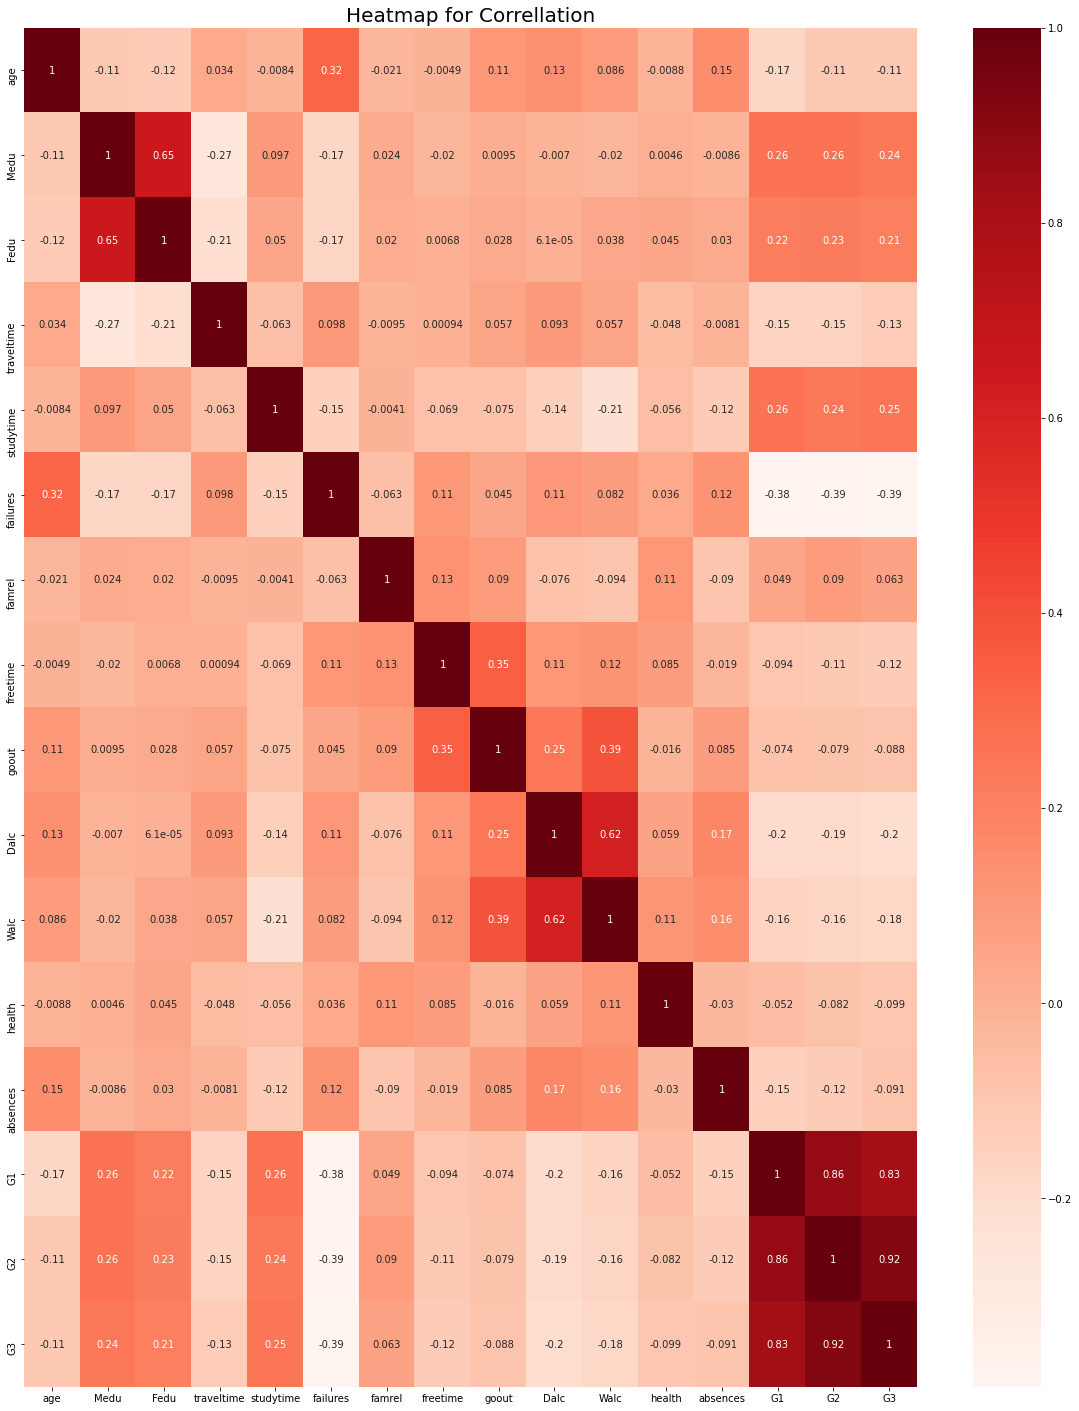

In [ ]:
import seaborn as sns
corr_matrix=df.corr()

plt.figure(figsize=(20,25))
sns.heatmap(corr_matrix,annot=True,cmap="Reds")
plt.title("Heatmap for Correllation", fontsize=20)

In [ ]:
student_df_features=df[["studytime","failures","Dalc","Walc","traveltime","freetime",
                  "Medu","Fedu","school","sex","address","Fjob","Mjob","reason","schoolsup","guardian","higher","internet","G1","G2","G3","health"]].copy()
student_df_features.head()

columns_to_conv=["school","sex","address","Fjob","Mjob","reason","schoolsup","guardian","higher","internet"]
student_converted_df=pd.get_dummies(student_df_features,columns=columns_to_conv)
student_converted_df

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,G1,G2,G3,health,school_GP,school_MS,sex_F,sex_M,address_R,address_U,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes
0,2,0,1,1,2,3,4,4,0,11,11,3,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
1,2,0,1,1,1,3,1,1,9,11,11,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
2,2,0,2,3,1,3,1,1,12,13,12,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
3,3,0,1,1,1,2,4,2,14,14,14,5,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,2,0,1,2,1,3,3,3,11,13,13,5,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,1,1,2,1,4,2,3,10,11,10,5,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1
645,2,0,1,1,1,3,3,1,15,15,16,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
646,2,0,1,1,2,1,1,1,11,12,9,5,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
647,1,0,3,4,2,4,3,1,10,10,10,2,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
x=np.array(student_converted_df.drop(["G3"],1))
y=np.array(student_converted_df["G3"])
x=StandardScaler().fit_transform(x)
x.shape

(649, 40)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Train Set', x_train.shape, y_train.shape)
print('Test Set', x_test.shape, y_test.shape)

Train Set (519, 40) (519,)
Test Set (130, 40) (130,)


In [ ]:
from sklearn import linear_model
regression=linear_model.LinearRegression()
regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: ', regression.coef_)
print('The Intercept: ', regression.intercept_)

Coefficients:  [ 1.40199459e-02 -2.17154608e-01 -7.85762689e-02 -1.58856232e-02
  1.42688519e-01 -8.31516901e-02 -1.48962001e-01  7.92539715e-02
  4.10640101e-01  2.51259330e+00 -6.62315135e-02  1.32670915e+13
  1.32670915e+13 -9.98004308e+12 -9.98004308e+12 -7.39541530e+11
 -7.39541530e+11 -1.77648418e+13 -1.33503742e+13 -3.57931517e+13
 -3.23820671e+13 -1.65281347e+13  1.22216114e+13  7.88021162e+12
  1.47359540e+13  1.22548546e+13  9.45658173e+12 -6.01008153e+13
 -5.09313723e+13 -3.80330712e+13 -5.01938512e+13  1.89081398e+12
  1.89081398e+12 -3.02947149e+12 -3.26728395e+12 -1.73629708e+12
  6.40823240e+12  6.40823240e+12  2.03870375e+13  2.03870375e+13]
The Intercept:  11.953571374539772


In [ ]:
from sklearn.metrics import r2_score
y_hat=regression.predict(x_test)
print('Mean absolute error: %.2f' %np.mean(np.absolute(y_hat - y_test)) )
print('Residual sum of squares(MSE): %.2f' %np.mean((y_hat - y_test)**2))
print('R_2 score: %.2f' %r2_score(y_hat, y_test))


Mean absolute error: 0.84
Residual sum of squares(MSE): 1.70
R_2 score: 0.83


In [ ]:
datosP=np.array([2,0,1,1,1,3,1,1,9,11,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1])
datosP = datosP.reshape(1,-1)
resultado_de_prueba=regression.predict(datosP)
print(resultado_de_prueba)

[2.86895553e+13]


# **DESICION TREE**

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini", splitter='best',max_depth=7, min_samples_split=4, min_samples_leaf=20, max_features=2)
tree.fit(x,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

export_graphviz(
                tree,
                out_file = 'arbol.dot',
                feature_names = list(X.columns),
                class_names = str(list(set(y))),
                filled = True,
                rounded = True
)

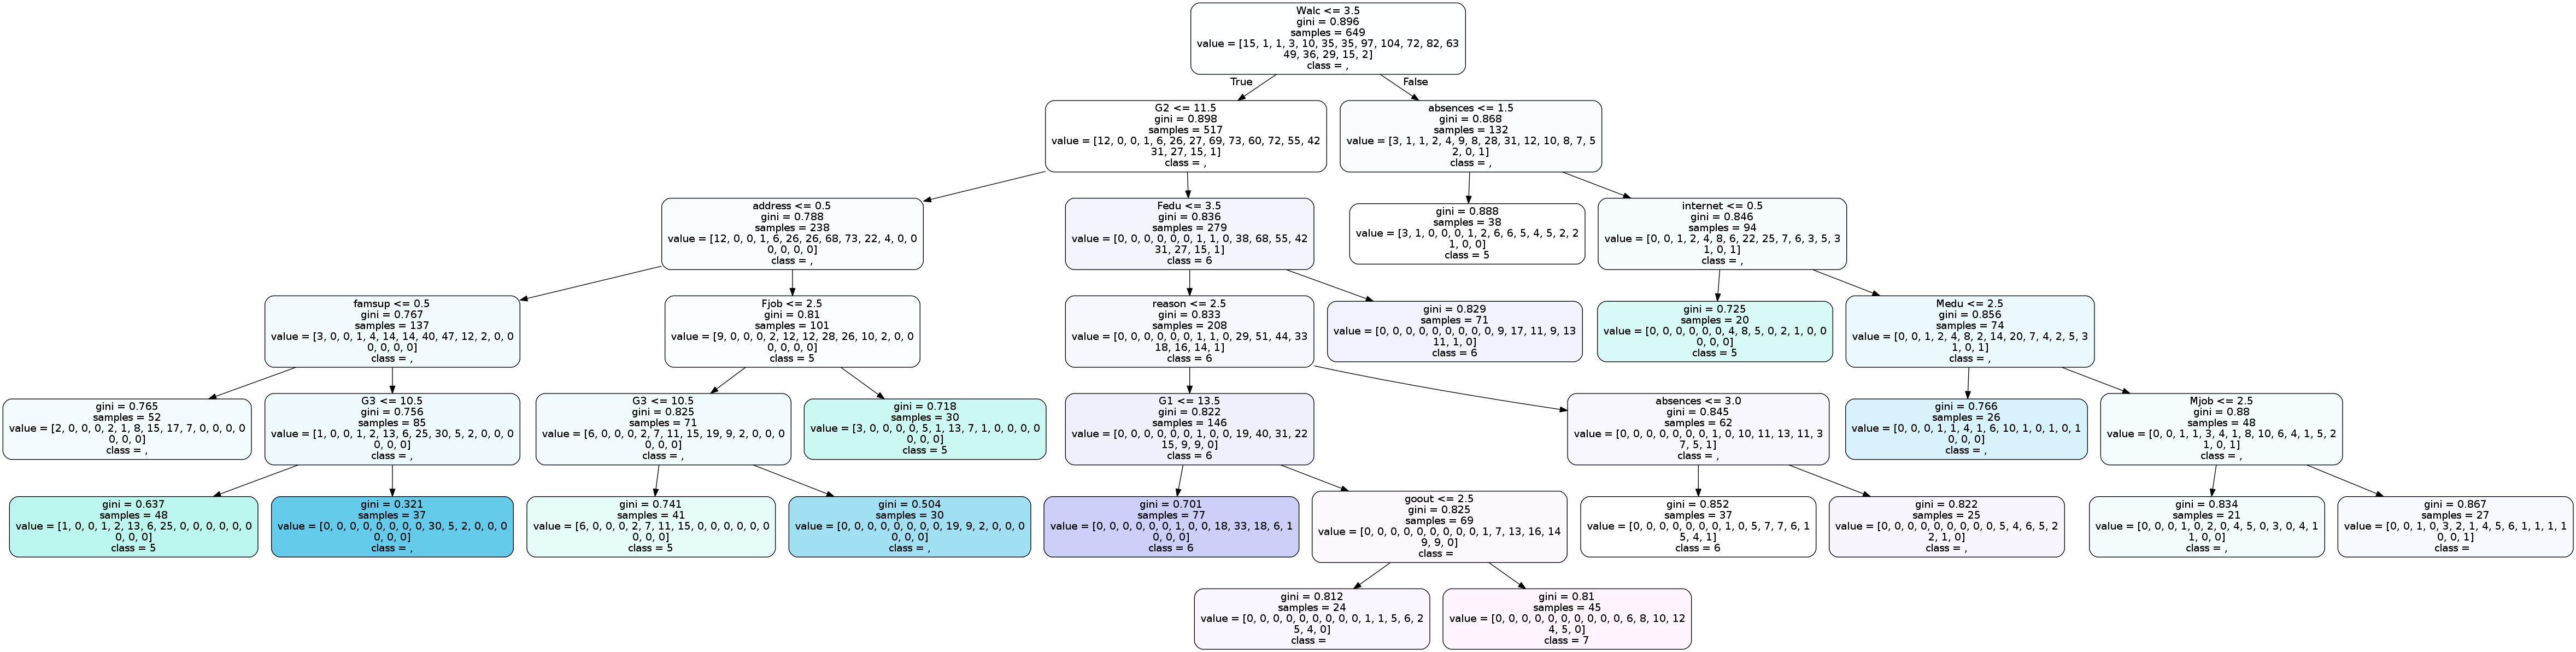

In [ ]:

print(x)
print(prominent_features)

[[ 0.08365295 -0.37430512 -0.54355533 ...  0.34491378  1.81604329
  -1.81604329]
 [ 0.08365295 -0.37430512 -0.54355533 ...  0.34491378 -0.55064767
   0.55064767]
 [ 0.08365295 -0.37430512  0.53855329 ...  0.34491378 -0.55064767
   0.55064767]
 ...
 [ 0.08365295 -0.37430512 -0.54355533 ...  0.34491378  1.81604329
  -1.81604329]
 [-1.12280848 -0.37430512  1.62066191 ...  0.34491378 -0.55064767
   0.55064767]
 [-1.12280848 -0.37430512  1.62066191 ...  0.34491378 -0.55064767
   0.55064767]]
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=8, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:

y_pred_train =classifier.predict(X_train)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)

Accuracy: 0.82


In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         6
           8       1.00      0.90      0.95        31
           9       0.86      0.78      0.82        32
          10       0.82      0.79      0.81        77
          11       0.78      0.88      0.83        83
          12       0.77      0.65      0.71        55
          13       0.80      0.84      0.82        67
          14       0.79      0.76      0.77        49
          15       0.79      0.85      0.82        40
          16       0.81      0.90      0.85        29
          17       1.00      0.83      0.91        24
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00         1

    accuracy              

In [ ]:
modelE = DecisionTreeClassifier(criterion='gini',max_depth=8, random_state=42)

In [ ]:
modelE.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_E =modelE.predict(x_train)
y_pred =modelE.predict(x_train)
print(classification_report(y_train, y_pred_E))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       1.00      1.00      1.00         1
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         2
           7       0.60      0.50      0.55         6
           8       0.85      0.90      0.88        31
           9       0.72      0.66      0.69        32
          10       0.80      0.87      0.83        77
          11       0.88      0.80      0.84        83
          12       0.81      0.84      0.82        55
          13       0.92      0.84      0.88        67
          14       0.78      0.92      0.84        49
          15       0.85      0.88      0.86        40
          16       0.86      0.86      0.86        29
          17       1.00      0.83      0.91        24
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00         1

    accuracy              

In [ ]:
dt=np.array([2,0,1,1,1,3,1,1,9,11,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1])
dt = dt.reshape(1,-1)
df_n=pd.DataFrame(data=dt)
#X_n=StandardScaler().fit_transform(df_n)

resultado_de_prueba=modelE.predict(df_n)
print(resultado_de_prueba)

[17]


In [ ]:
dt=np.array([2,0,1,1,1,3,1,1,9,11,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1])
dt = dt.reshape(1,-1)
df_n=pd.DataFrame(data=dt)
#X_n=StandardScaler().fit_transform(df_n)

resultado_de_prueba=classifier.predict(df_n)
print(resultado_de_prueba)

[17]


# **DECISION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=7)
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_prds = regressor.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score
print('Mean absolute error: %.2f' %np.mean(np.absolute(y_prds - y_test)) )
print('Residual sum of squares(MSE): %.2f' %np.mean((y_prds - y_test)**2))
print('R_2 score: %.2f' %r2_score(y_prds, y_test))

Mean absolute error: 0.49
Residual sum of squares(MSE): 0.47
R_2 score: 0.96


In [ ]:
dt=np.array([2,0,1,1,1,3,1,1,9,11,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1])
dt = dt.reshape(1,-1)
df_n=pd.DataFrame(data=dt)
resultado_de_prueba=regressor.predict(df_n)
print(resultado_de_prueba)

[17.11111111]
